# Air Quality & Health EDA (Steps 1.1?1.2)
Context: follow Context.md instructions. This notebook performs initial inspection and missing-data analysis for the three datasets.

## Step 1.1: Initial Data Loading and Inspection

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 50)

files = {
    'cause_of_deaths': 'cause_of_deaths.csv',
    'city_day': 'city_day.csv',
    'global_air_pollution_data': 'global_air_pollution_data.csv',
}

dfs = {name: pd.read_csv(path) for name, path in files.items()}
for name, df in dfs.items():
    print(f"\n=== {name} ===")
    print('shape:', df.shape)

    print('\nhead:')
    display(df.head(10))

    print('\ndtypes:')
    display(df.dtypes)

    mem = df.memory_usage(deep=True).sum() / (1024 * 1024)
    print(f"\nmemory usage: {mem:.2f} MB")

    print('\ndescribe numeric:')
    display(df.describe().head())

    obj_cols = df.select_dtypes(include=['object']).columns
    if len(obj_cols):
        print('\ndescribe object columns:')
        display(df[obj_cols].describe().head())

    dup = df.duplicated().sum()
    print(f"\nduplicate rows: {dup}\n")



=== cause_of_deaths ===
shape: (6120, 34)

head:


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,Afghanistan,AFG,1995,3102,1225,394,3131,175,1881,2969,4035,71,151,5628,50158,34030,23722,91,1032,381,9566,46,13106,5525,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,Afghanistan,AFG,1996,3193,1239,398,3175,175,1969,3331,4203,78,159,5821,51125,34787,24104,93,1070,70,9682,49,13335,3255,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,Afghanistan,AFG,1997,3304,1253,402,3250,240,2078,3028,4351,84,168,5949,52039,35565,24368,96,1104,175,10656,50,13572,6723,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,Afghanistan,AFG,1998,3281,1267,405,3193,563,2098,3098,4397,89,173,5930,52720,34943,24010,97,1114,7123,11155,51,13695,12073,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,Afghanistan,AFG,1999,3200,1281,409,3115,468,2084,2917,4327,93,178,5887,53413,33713,23386,98,1120,70,11313,51,13811,5104,2437,4150,502,3068,6603,7400,3247,6182,470,4332



dtypes:


Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     


memory usage: 2.13 MB

describe numeric:


,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,434.006699,7491.928595,73160.454575,13687.914706,12558.942647,787.421242,3874.825327,243.485621,10822.795425,292.295915,37542.244771,538.243954,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,17092.374837,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,2898.761628,39549.977578,291577.537794,48031.720009,56058.366412,3545.823616,18425.616418,4717.104377,65416.174485,1704.466356,161558.365445,7033.308187,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,105157.179839,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,3.000000,35.000000,2028.000000,345.000000,131.000000,9.000000,94.000000,0.000000,20.000000,2.000000,809.750000,0.000000,236.000000,145.750000,6.000000,5.000000,174.750000,289.000000,154.000000,284.000000,17.000000,2.000000



describe object columns:


,Country/Territory,Code
count,6120,6120
unique,204,204
top,Afghanistan,AFG
freq,30,30



duplicate rows: 0


=== city_day ===
shape: (29531, 16)

head:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN



dtypes:


City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


memory usage: 7.71 MB

describe numeric:


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000



describe object columns:


,City,Date,AQI_Bucket
count,29531,29531,24850
unique,26,2009,6
top,Ahmedabad,2020-06-26,Moderate
freq,2009,26,8829



duplicate rows: 0


=== global_air_pollution_data ===
shape: (23463, 12)

head:


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups



dtypes:


country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object


memory usage: 9.64 MB

describe numeric:


,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000



describe object columns:


,country_name,city_name,aqi_category,co_aqi_category,ozone_aqi_category,no2_aqi_category,pm2.5_aqi_category
count,23036,23462,23463,23463,23463,23463,23463
unique,175,23462,6,3,5,2,6
top,United States of America,Praskoveya,Good,Good,Good,Good,Good
freq,2872,1,9936,23460,21069,23448,10208



duplicate rows: 0



## Step 1.2: Missing Data Analysis

In [3]:
import numpy as np

cause = dfs['cause_of_deaths']
city_day = dfs['city_day']
global_df = dfs['global_air_pollution_data']

# Missing percentage per column
for name, df in [
    ('cause_of_deaths', cause),
    ('city_day', city_day),
    ('global_air_pollution_data', global_df),
]:
    print(f"\n-- Missing % for {name} --")
    miss = df.isna().mean().sort_values(ascending=False) * 100
    display(miss)
    high = miss[miss > 50]
    if not high.empty:
        print("Columns >50% missing:")
        display(high)

# city_day-specific: AQI missing by city/year and pollutant missingness
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day['Year'] = city_day['Date'].dt.year

print('\n-- city_day AQI missing by city --')
missing_aqi_city = city_day['AQI'].isna().groupby(city_day['City']).mean().sort_values(ascending=False) * 100
display(missing_aqi_city)

print('\n-- city_day AQI missing by year --')
missing_aqi_year = city_day['AQI'].isna().groupby(city_day['Year']).mean().sort_values(ascending=False) * 100
display(missing_aqi_year)

print('\n-- city_day pollutant missing % --')
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']
poll_missing = city_day[pollutants].isna().mean().sort_values(ascending=False) * 100
display(poll_missing)



-- Missing % for cause_of_deaths --


Country/Territory                             0.0
Code                                          0.0
Year                                          0.0
Meningitis                                    0.0
Alzheimer's Disease and Other Dementias       0.0
Parkinson's Disease                           0.0
Nutritional Deficiencies                      0.0
Malaria                                       0.0
Drowning                                      0.0
Interpersonal Violence                        0.0
Maternal Disorders                            0.0
HIV/AIDS                                      0.0
Drug Use Disorders                            0.0
Tuberculosis                                  0.0
Cardiovascular Diseases                       0.0
Lower Respiratory Infections                  0.0
Neonatal Disorders                            0.0
Alcohol Use Disorders                         0.0
Self-harm                                     0.0
Exposure to Forces of Nature                  0.0



-- Missing % for city_day --


Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64

Columns >50% missing:


Xylene    61.322001
dtype: float64


-- Missing % for global_air_pollution_data --


country_name          1.819887
city_name             0.004262
aqi_value             0.000000
aqi_category          0.000000
co_aqi_value\t        0.000000
co_aqi_category       0.000000
ozone_aqi_value       0.000000
ozone_aqi_category    0.000000
no2_aqi_value         0.000000
no2_aqi_category      0.000000
pm2.5_aqi_value       0.000000
pm2.5_aqi_category    0.000000
dtype: float64


-- city_day AQI missing by city --


City
Mumbai                61.423594
Jorapokhar            34.046193
Shillong              33.870968
Ahmedabad             33.598805
Talcher               24.540541
Brajrajnagar          23.987207
Patna                 21.474704
Visakhapatnam         19.904241
Gurugram              13.460393
Amaravati             11.566772
Coimbatore            10.880829
Amritsar               7.780508
Kolkata                7.371007
Hyderabad              6.281157
Chennai                6.222001
Lucknow                5.774017
Ernakulam              5.555556
Thiruvananthapuram     5.395683
Bengaluru              4.927825
Bhopal                 3.806228
Kochi                  2.469136
Jaipur                 1.795332
Aizawl                 1.769912
Chandigarh             1.644737
Guwahati               1.394422
Delhi                  0.497760
Name: AQI, dtype: float64


-- city_day AQI missing by year --


Year
2015    34.773295
2017    31.030070
2016    26.020702
2018    11.543811
2019     5.036261
2020     4.842876
Name: AQI, dtype: float64


-- city_day pollutant missing % --


Xylene     61.322001
PM10       37.723071
NH3        34.973418
Toluene    27.229014
Benzene    19.041008
AQI        15.851139
PM2.5      15.570079
NOx        14.171549
O3         13.619586
SO2        13.050692
NO2        12.139785
NO         12.129626
CO          6.972334
dtype: float64

Country/Territory
China            206769145
India            112409791
United States     52541338
Russia            45614764
Japan             23631311
Indonesia         22639911
Germany           19866121
Brazil            18936198
Ukraine           17150152
Pakistan          16084008
dtype: int64

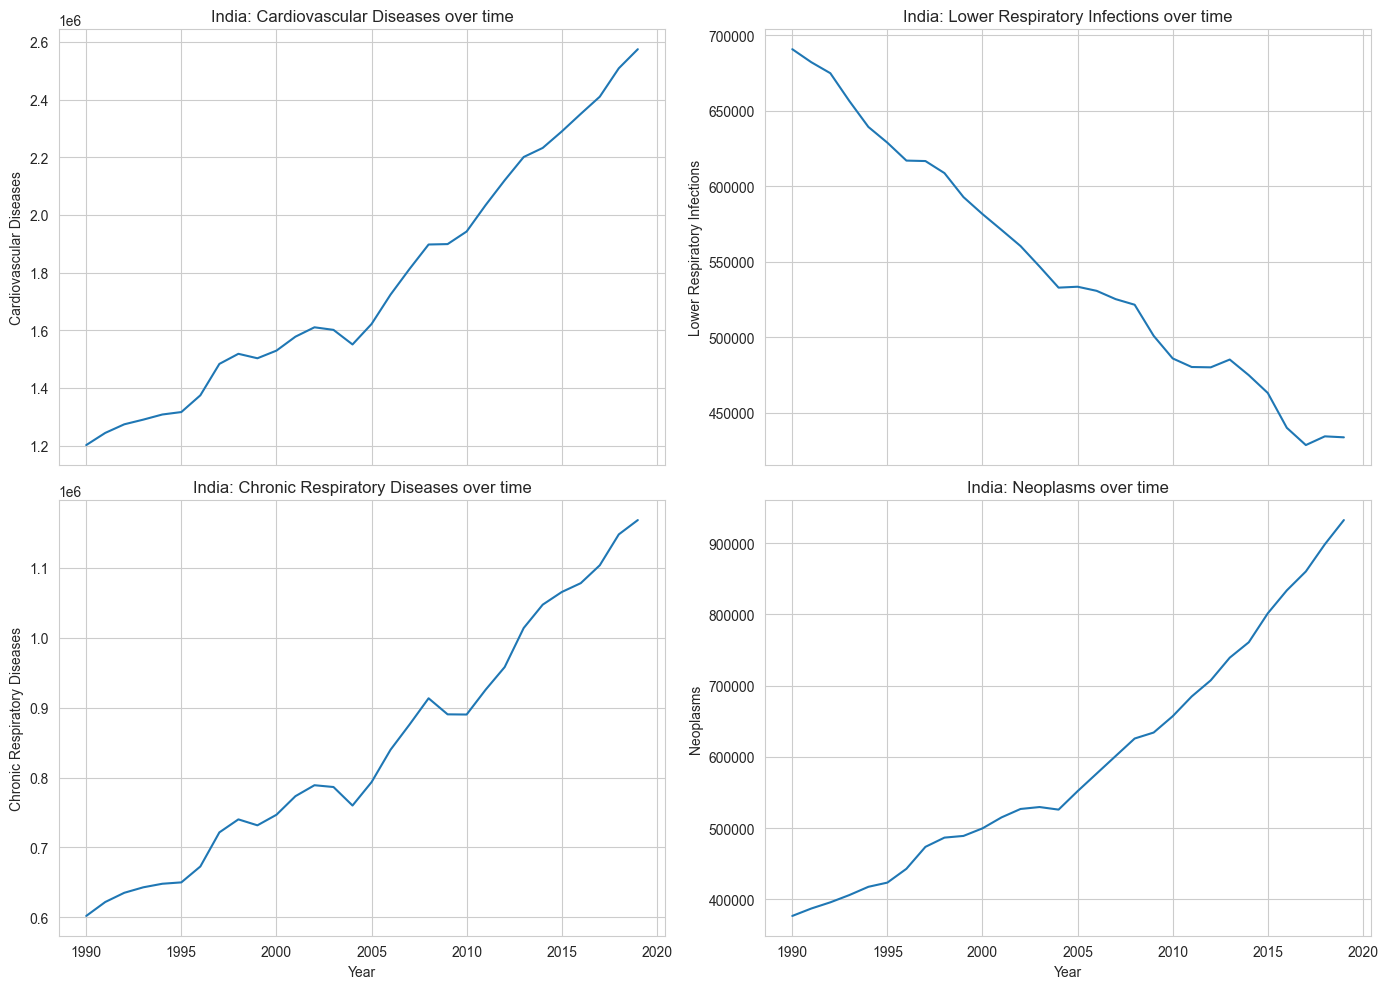

Year
2015     4.056094
1990   -37.837724
1991     2.224687
1992     1.512035
1993     0.532516
1994     0.576398
1995     0.196829
1996     2.925371
1997     6.056256
1998     1.779574
1999    -1.117833
2000     1.234018
2001     2.381715
2002     1.432996
2003    -0.640335
2004    -2.733382
2005     3.879837
2006     4.870071
2010     8.306653
2011     3.755437
2014     9.465332
2016     4.137204
2017     2.132887
2018     3.886333
2019     2.405991
dtype: float64

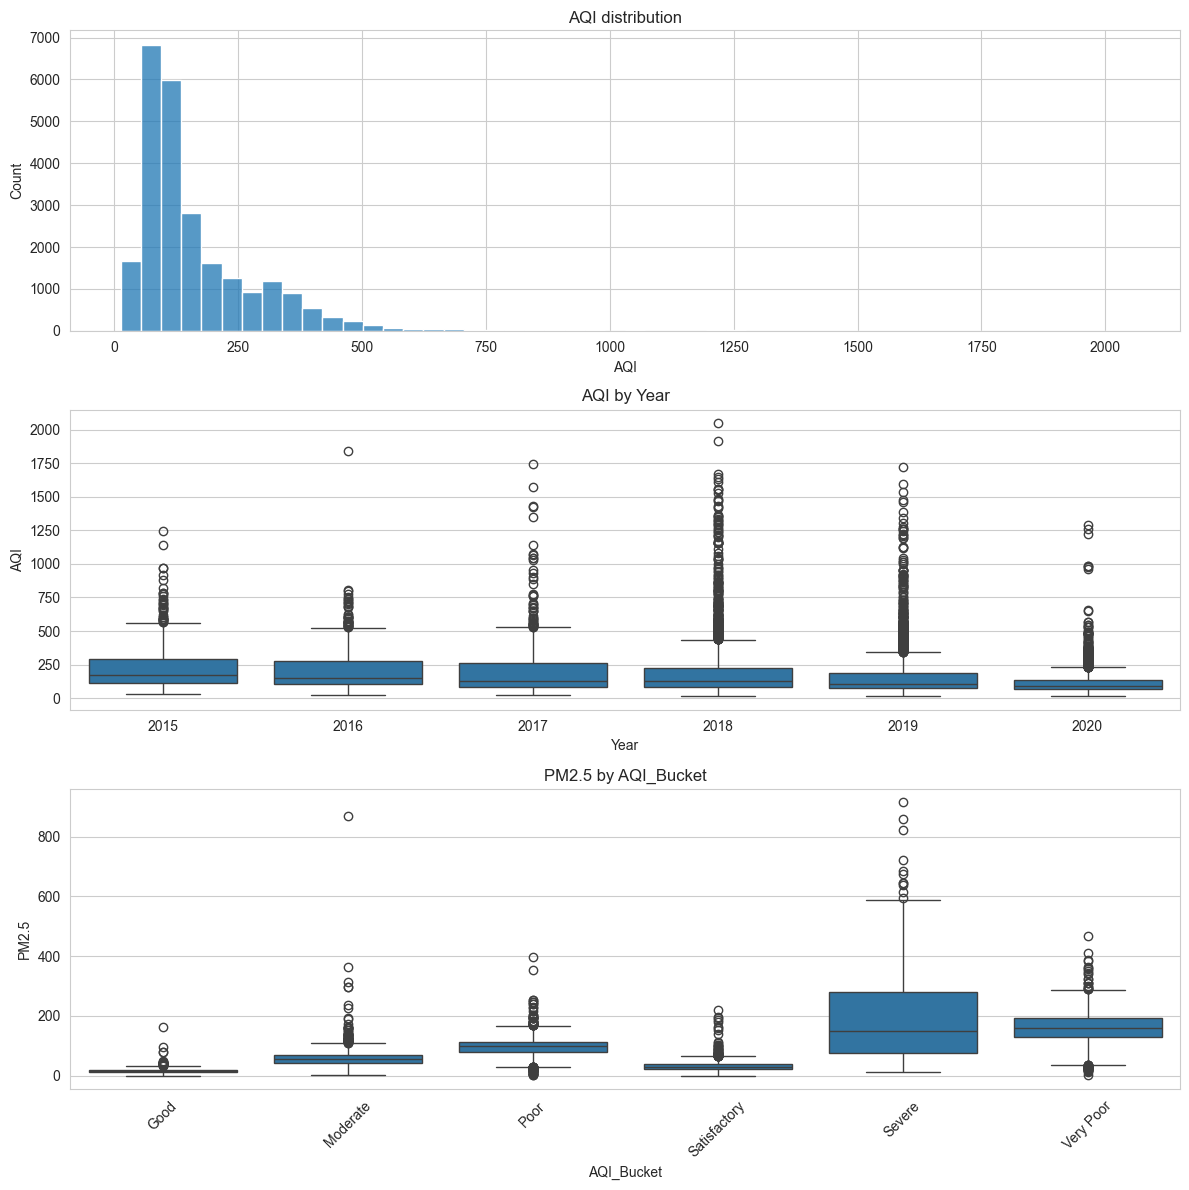

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,208.000000
90%,139.890000,231.880000,40.050000,58.155000,69.360000,48.330000,2.630000,29.680000,62.012000,341.000000
95%,193.960000,303.340000,61.190000,74.125000,96.357500,63.427000,8.024500,46.208000,74.142000,407.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,2049.000000


C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2574784464.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=city_day[city_day['City'].isin(sample_cities)], x='Date', y='AQI', hue='City', estimator='mean', ci=None, ax=ax)


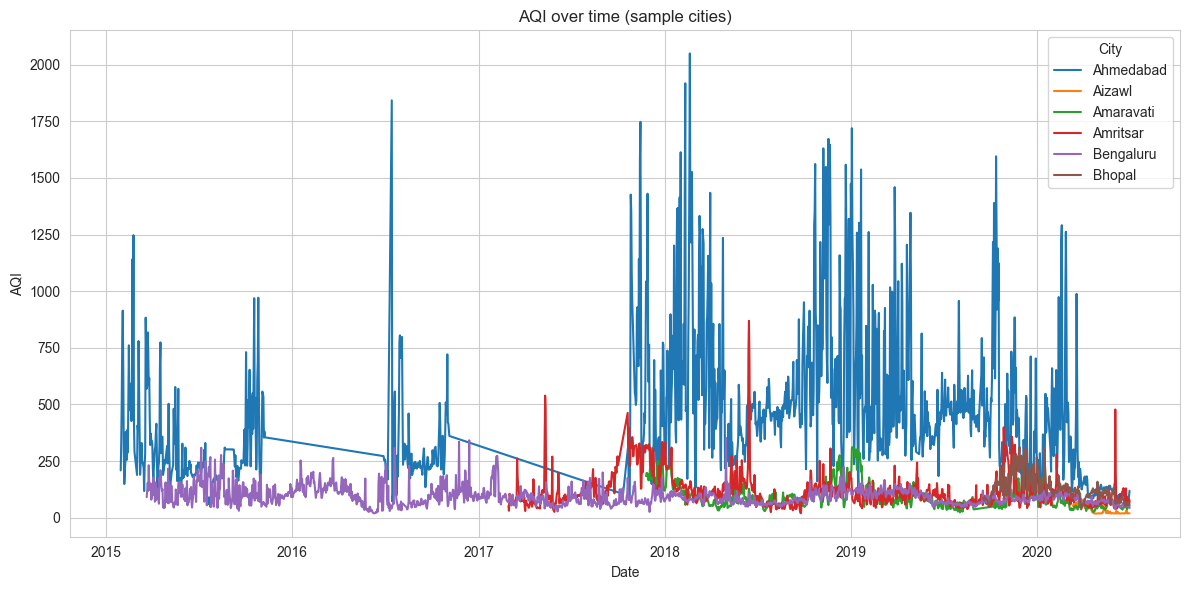

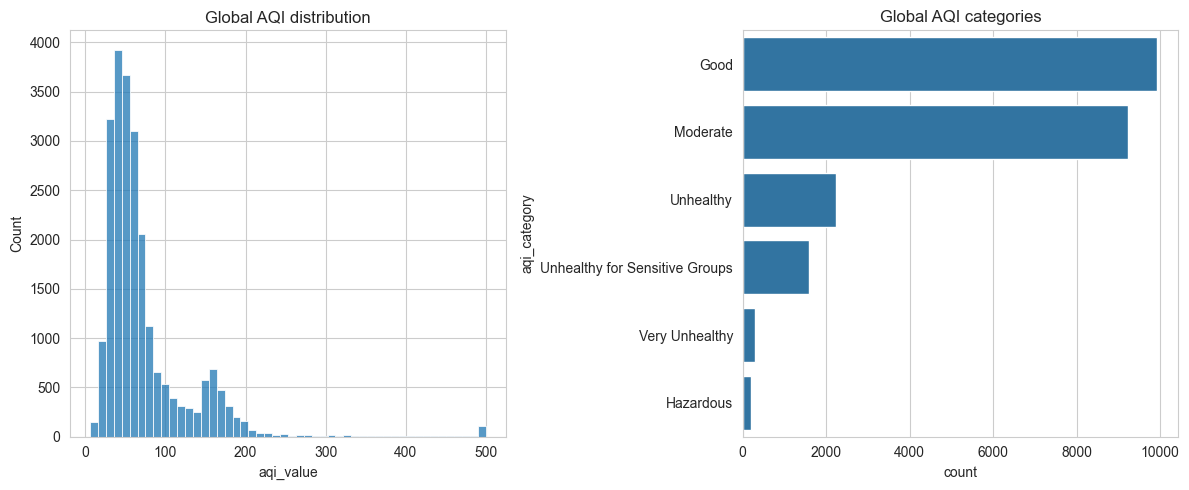

Mean AQI (global dataset): India=152.96, Global=72.01


aqi_category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

In [4]:
# Step 1.3 — Univariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cause = dfs['cause_of_deaths']
city_day = dfs['city_day'].copy()
global_df = dfs['global_air_pollution_data'].rename(columns={'co_aqi_value\t': 'co_aqi_value'})

sns.set_style("whitegrid")

# 1) cause_of_deaths: distributions & India time series
key_cols = [
    'Cardiovascular Diseases',
    'Lower Respiratory Infections',
    'Chronic Respiratory Diseases',
    'Neoplasms'
]

# Top 10 countries by total deaths (selected causes)
total_by_country = cause.groupby('Country/Territory')[key_cols].sum().sum(axis=1).sort_values(ascending=False).head(10)
display(total_by_country)

# India time series 1990–2019 for key causes
india = cause[cause['Country/Territory'] == 'India'][['Year'] + key_cols]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
for col, ax in zip(key_cols, axes.flatten()):
    sns.lineplot(data=india, x='Year', y=col, ax=ax)
    ax.set_title(f'India: {col} over time')
plt.tight_layout()
plt.show()

# India YoY growth for summed key causes
india_total = india.set_index('Year')[key_cols].sum(axis=1)
india_yoy = india_total.pct_change() * 100
display(india_yoy.loc[2015:2019])

# 2) city_day: pollutant & AQI distributions
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day['Year'] = city_day['Date'].dt.year

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
sns.histplot(city_day['AQI'].dropna(), bins=50, ax=axes[0])
axes[0].set_title('AQI distribution')

sns.boxplot(x='Year', y='AQI', data=city_day, ax=axes[1])
axes[1].set_title('AQI by Year')

sns.boxplot(x='AQI_Bucket', y='PM2.5', data=city_day, order=sorted(city_day['AQI_Bucket'].dropna().unique()), ax=axes[2])
axes[2].set_title('PM2.5 by AQI_Bucket')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Pollutant distribution summary
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
display(city_day[pollutant_cols + ['AQI']].describe(percentiles=[0.25,0.5,0.75,0.9,0.95]))

# AQI trends per city (optional: sample few to keep plot readable)
sample_cities = city_day['City'].unique()[:6]
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=city_day[city_day['City'].isin(sample_cities)], x='Date', y='AQI', hue='City', estimator='mean', ci=None, ax=ax)
ax.set_title('AQI over time (sample cities)')
plt.tight_layout()
plt.show()

# 3) global_air_pollution_data: AQI distributions
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(global_df['aqi_value'], bins=50, ax=axes[0])
axes[0].set_title('Global AQI distribution')

sns.countplot(y='aqi_category', data=global_df, order=global_df['aqi_category'].value_counts().index, ax=axes[1])
axes[1].set_title('Global AQI categories')
plt.tight_layout()
plt.show()

# India vs Global (global dataset)
india_global = global_df[global_df['country_name'] == 'India']
print(f"Mean AQI (global dataset): India={india_global['aqi_value'].mean():.2f}, Global={global_df['aqi_value'].mean():.2f}")
display(global_df['aqi_category'].value_counts())


# Inference
India 2015–2019: pollution-related deaths (cardio/respiratory/neoplasms) are massive and still growing ~2–4% YoY; China leads overall, India is #2 by total deaths.
Indian city AQI is high (median ~118, 75th percentile ~208) with a long tail to extreme spikes; national mean AQI declines steadily from ~212 (2015) to ~114 (2020).
Global dataset skews to Good/Moderate AQI, but India’s mean (~153) is over 2× the global average (~72).

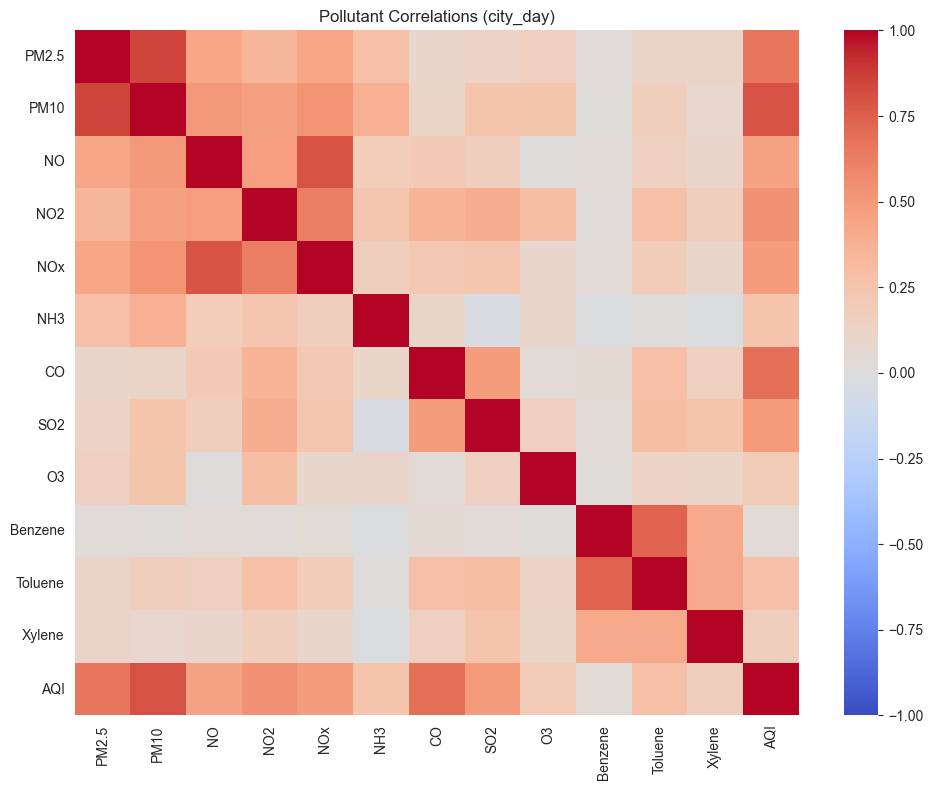

PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Xylene     0.165532
Benzene    0.044407
Name: AQI, dtype: float64

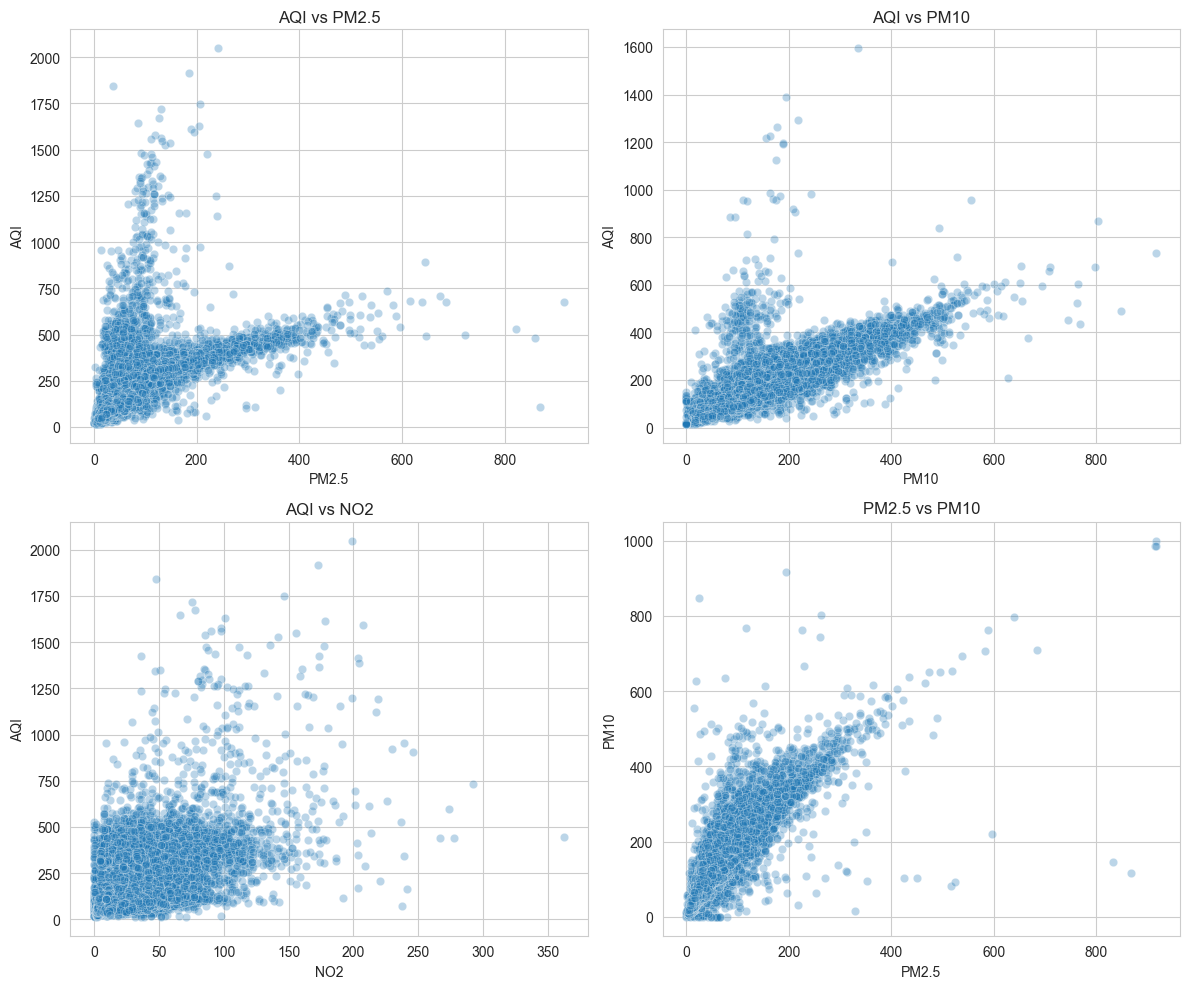

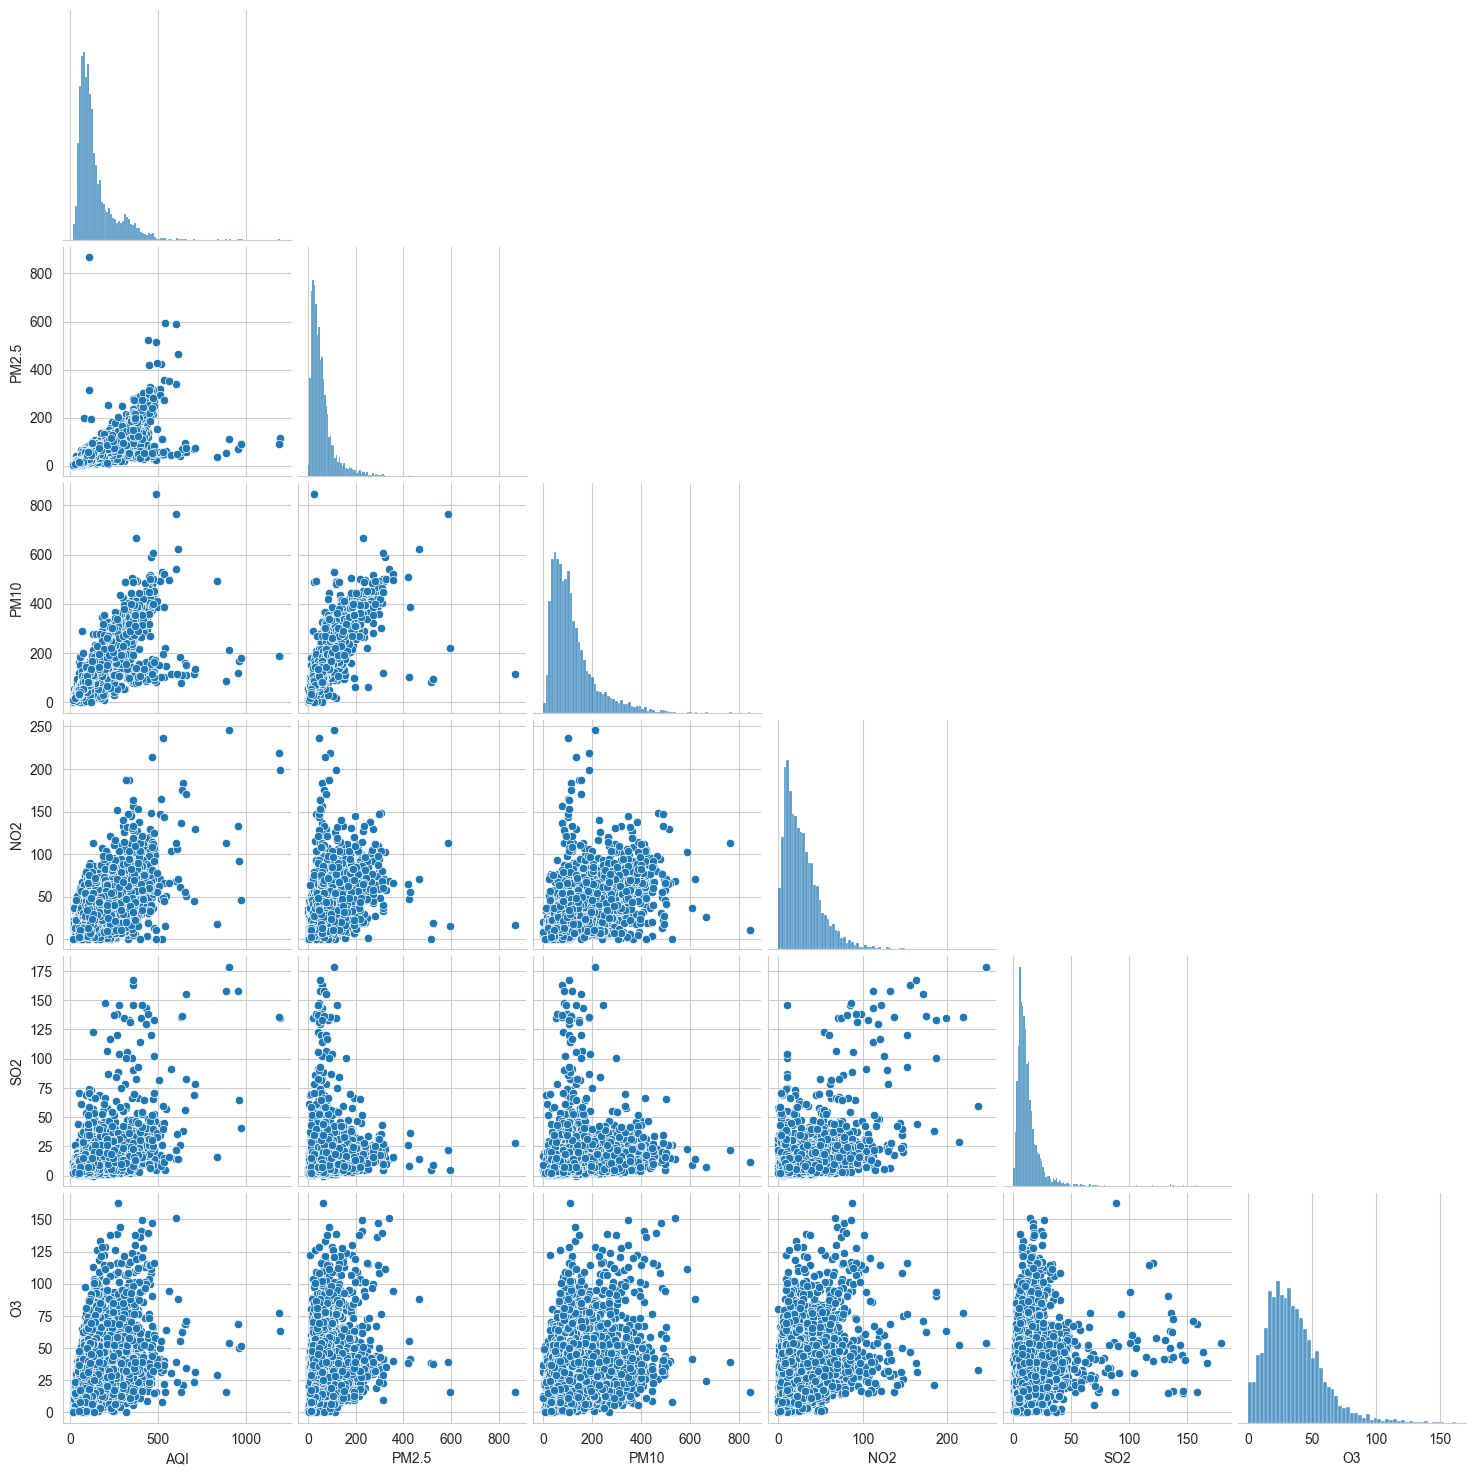

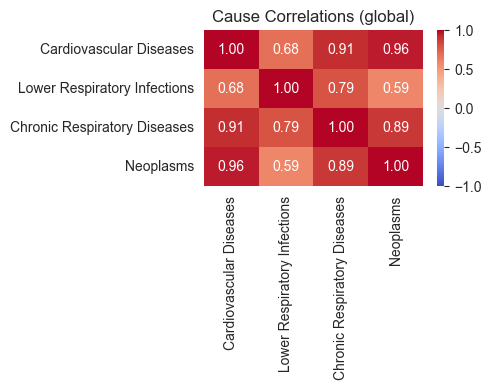

Correlation: AQI/PM vs India deaths (2015–2020 window):


,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms
AQI,-0.940917,0.769961,-0.911391,-0.955838
PM2.5,-0.874492,0.272919,-0.909693,-0.855472
PM10,-0.871576,0.934640,-0.821631,-0.893825


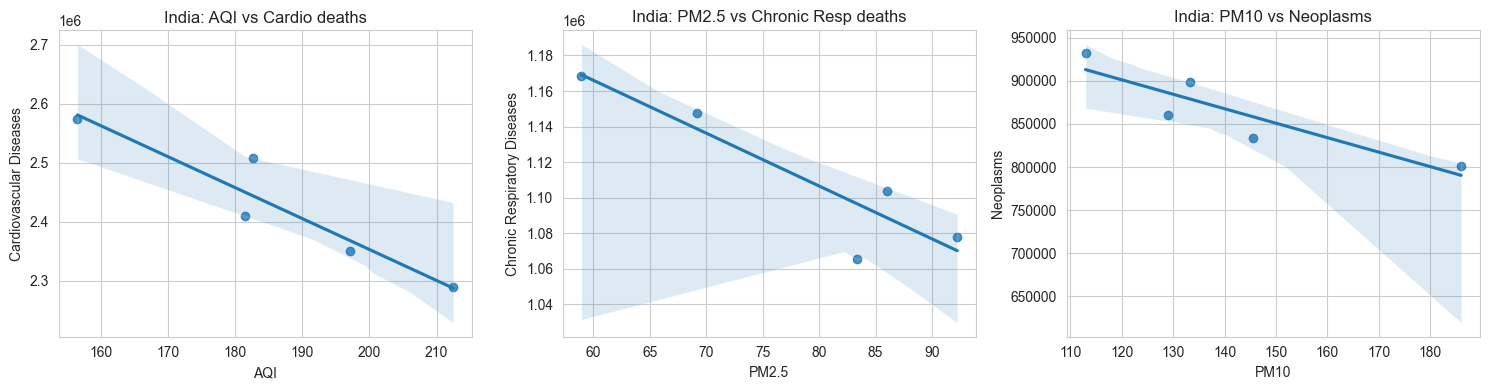

[('PM2.5', 'PM10', np.float64(0.8464982323636056)),
 ('PM10', 'AQI', np.float64(0.8033134425895792)),
 ('NO', 'NOx', np.float64(0.7948901656058581)),
 ('Benzene', 'Toluene', np.float64(0.7392864023719319))]

In [5]:
# Step 1.4 — Bivariate/Multivariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year

pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

# Correlation heatmap (city_day)
corr_poll = city[pollutants].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_poll, vmin=-1, vmax=1, cmap='coolwarm', center=0)
plt.title('Pollutant Correlations (city_day)')
plt.tight_layout()
plt.show()

# Key correlations AQI vs pollutants
corr_aqi = corr_poll.loc['AQI'].drop('AQI').sort_values(ascending=False)
display(corr_aqi)

# Scatter plots: AQI vs key pollutants + PM2.5 vs PM10
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.scatterplot(data=city, x='PM2.5', y='AQI', alpha=0.3, ax=axes[0,0])
axes[0,0].set_title('AQI vs PM2.5')

sns.scatterplot(data=city, x='PM10', y='AQI', alpha=0.3, ax=axes[0,1])
axes[0,1].set_title('AQI vs PM10')

sns.scatterplot(data=city, x='NO2', y='AQI', alpha=0.3, ax=axes[1,0])
axes[1,0].set_title('AQI vs NO2')

sns.scatterplot(data=city, x='PM2.5', y='PM10', alpha=0.3, ax=axes[1,1])
axes[1,1].set_title('PM2.5 vs PM10')

plt.tight_layout()
plt.show()

# Pairplot for top pollutants (sampled for speed)
pair_cols = ['AQI','PM2.5','PM10','NO2','SO2','O3']
sample = city[pair_cols].dropna().sample(n=min(5000, city.shape[0]), random_state=0)
sns.pairplot(sample, corner=True)
plt.show()

# Cause-of-deaths correlations (global)
cause = dfs['cause_of_deaths']
key_causes = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']
plt.figure(figsize=(5,4))
sns.heatmap(cause[key_causes].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Cause Correlations (global)')
plt.tight_layout()
plt.show()

# Cross-dataset: national AQI vs India deaths by year
city_year = city.groupby('Year')[['AQI','PM2.5','PM10']].mean().dropna()
india = cause[cause['Country/Territory']=='India'].set_index('Year')[key_causes]
merged = city_year.join(india, how='inner')

print("Correlation: AQI/PM vs India deaths (2015–2020 window):")
display(merged.corr().loc[['AQI','PM2.5','PM10'], key_causes])

fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.regplot(data=merged, x='AQI', y='Cardiovascular Diseases', ax=ax[0])
ax[0].set_title('India: AQI vs Cardio deaths')
sns.regplot(data=merged, x='PM2.5', y='Chronic Respiratory Diseases', ax=ax[1])
ax[1].set_title('India: PM2.5 vs Chronic Resp deaths')
sns.regplot(data=merged, x='PM10', y='Neoplasms', ax=ax[2])
ax[2].set_title('India: PM10 vs Neoplasms')
plt.tight_layout()
plt.show()

# High pollutant-pollutant pairs (for multicollinearity note)
high_pairs = []
for i, c1 in enumerate(pollutants):
    for c2 in pollutants[i+1:]:
        val = corr_poll.loc[c1, c2]
        if not np.isnan(val) and abs(val) >= 0.7:
            high_pairs.append((c1, c2, val))
display(sorted(high_pairs, key=lambda x: -abs(x[2])))


**Step 1.4 takeaways**
- AQI tracks particulates: PM10 (r≈0.80) and PM2.5 (r≈0.66); PM2.5–PM10 are highly collinear (r≈0.85), so watch multicollinearity.
- Combustion/traffic markers (CO, NO2/NOx, SO2) have moderate links to AQI; aromatics are weak.
- Global causes: cardiovascular, chronic respiratory, and neoplasm deaths move together strongly (r>0.88).
- India 2015–2020: mean AQI declines while deaths keep rising, so simple correlations flip negative—this reflects opposing trends, not causality. Proper lagged/time-aware modeling needed later.


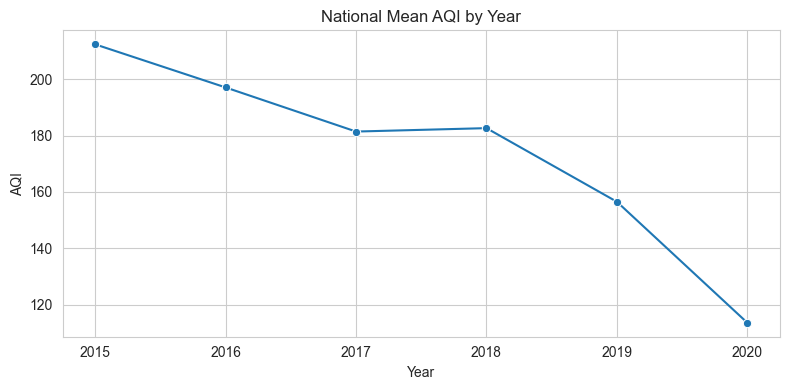

Year
2015          NaN
2016    -7.207387
2017    -7.951929
2018     0.667606
2019   -14.323145
2020   -27.471236
Name: AQI, dtype: float64

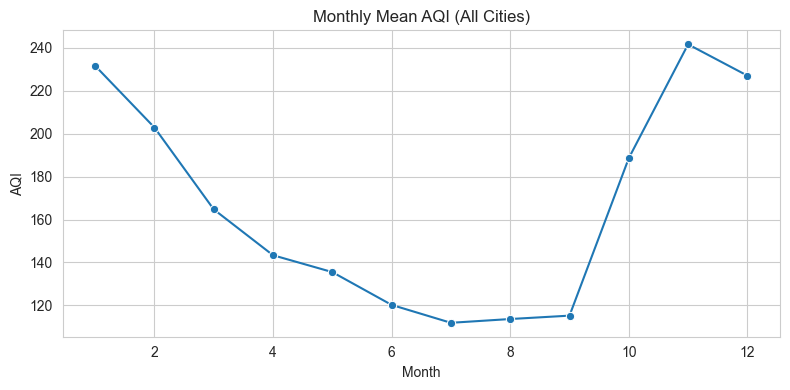

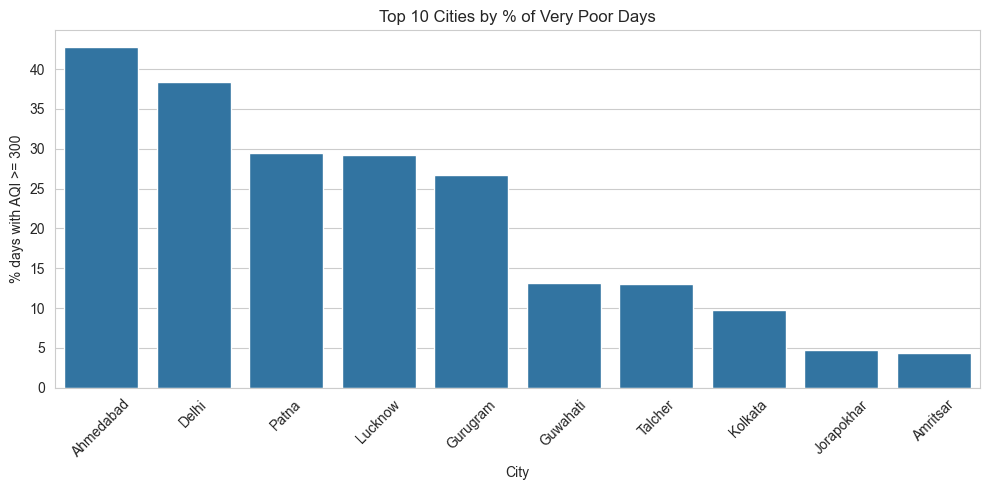

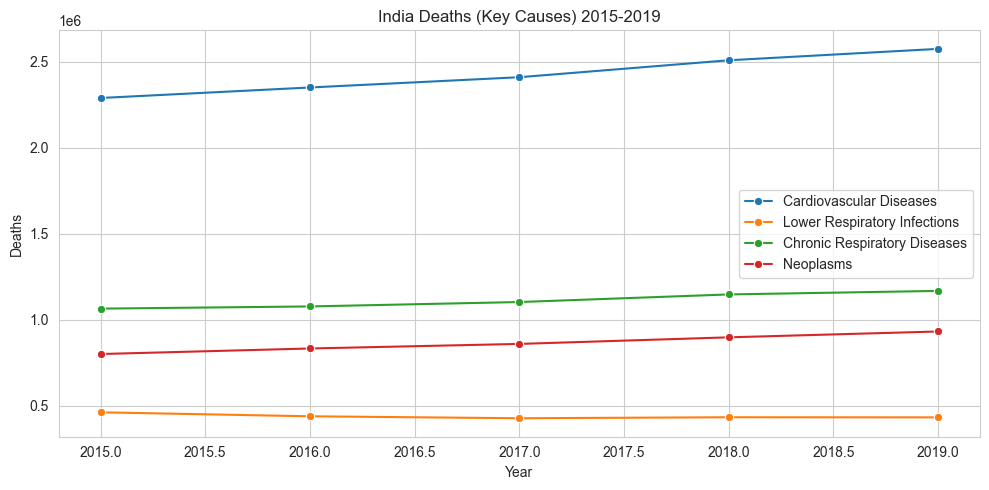

Year
2015         NaN
2016    1.795265
2017    2.132887
2018    3.886333
2019    2.405991
dtype: float64

In [6]:
# Step 1.5 — Temporal Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year
city['Month'] = city['Date'].dt.month

# National mean AQI by year
national_year = city.groupby('Year')['AQI'].mean().dropna()
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=national_year.index, y=national_year.values, marker='o', ax=ax)
ax.set_title('National Mean AQI by Year')
ax.set_ylabel('AQI')
plt.tight_layout()
plt.show()

# YoY %
national_yoy = national_year.pct_change()*100
display(national_yoy)

# Monthly seasonality
monthly_aqi = city.groupby('Month')['AQI'].mean()
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=monthly_aqi.index, y=monthly_aqi.values, marker='o', ax=ax)
ax.set_title('Monthly Mean AQI (All Cities)')
ax.set_ylabel('AQI')
plt.tight_layout()
plt.show()

# Very Poor days share per city (AQI >= 300)
city['VPoor'] = city['AQI'] >= 300
vpoor_city = city.groupby('City')['VPoor'].mean().sort_values(ascending=False) * 100
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=vpoor_city.head(10).index, y=vpoor_city.head(10).values, ax=ax)
ax.set_title('Top 10 Cities by % of Very Poor Days')
ax.set_ylabel('% days with AQI >= 300')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# India deaths trend 2015-2019 (key causes)
cause = dfs['cause_of_deaths']
key_cols = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']
india = cause[cause['Country/Territory']=='India'][['Year'] + key_cols]
india_recent = india[india['Year'].between(2015, 2019)]

fig, ax = plt.subplots(figsize=(10,5))
for col in key_cols:
    sns.lineplot(data=india_recent, x='Year', y=col, marker='o', label=col, ax=ax)
ax.set_title('India Deaths (Key Causes) 2015-2019')
ax.set_ylabel('Deaths')
plt.tight_layout()
plt.show()

india_total = india_recent.set_index('Year')[key_cols].sum(axis=1)
india_total_yoy = india_total.pct_change()*100
display(india_total_yoy)


**Step 1.5 takeaways**
- National mean AQI declines steadily 2015→2020; biggest drops in 2019–2020. Winter months (Nov–Jan) are worst; monsoon months (Jul–Sep) are cleanest.
- “Very Poor” days cluster in Ahmedabad, Delhi, Lucknow, Patna, Gurugram (20–40% of days).
- India cardio/resp/neoplasm deaths continue rising ~2–4% YoY through 2019 despite AQI improvements, reinforcing the need for time-lagged analysis later.


,count,mean,median,std,min,max
City,,,,,,
Ahmedabad,1334,452.122939,384.5,311.729553,48.0,2049.0
Delhi,1999,259.487744,257.0,119.537333,29.0,716.0
Patna,1459,240.782042,215.0,122.341700,53.0,619.0
Gurugram,1453,225.123882,208.0,119.943231,38.0,891.0
Lucknow,1893,217.973059,198.0,116.962788,39.0,707.0
Talcher,698,172.886819,128.5,104.867985,13.0,570.0
Jorapokhar,771,159.251621,133.0,84.698680,27.0,604.0
Brajrajnagar,713,150.280505,122.0,70.370248,22.0,355.0
Kolkata,754,140.566313,94.0,104.492533,26.0,475.0


City
Ahmedabad     42.707815
Delhi         38.327526
Patna         29.440258
Lucknow       29.168741
Gurugram      26.742108
Guwahati      13.147410
Talcher       13.081081
Kolkata        9.705160
Jorapokhar     4.704876
Amritsar       4.422604
Name: VPoor, dtype: float64

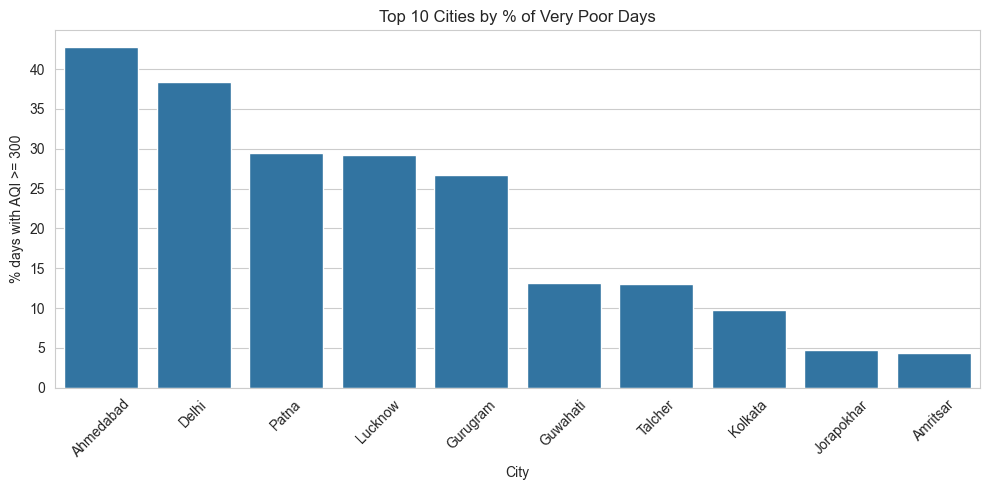

City
Ahmedabad                  CO
Aizawl                Benzene
Amaravati                  O3
Amritsar               Xylene
Bengaluru                 NO2
Bhopal                     O3
Brajrajnagar              NH3
Chandigarh                NH3
Chennai                   NH3
Coimbatore                NO2
Delhi                    PM10
Ernakulam                  NO
Gurugram                PM2.5
Guwahati                  NOx
Hyderabad                 NO2
Jaipur                     O3
Jorapokhar                SO2
Kochi                      NO
Kolkata                   NOx
Lucknow                 PM2.5
Mumbai                    NOx
Patna                   PM2.5
Shillong              Benzene
Talcher                   SO2
Thiruvananthapuram         O3
Visakhapatnam             NO2
dtype: object

Indian cities overlapping both datasets: {'Aizawl', 'Hyderabad', 'Chandigarh', 'Jaipur', 'Amritsar', 'Delhi', 'Bhopal', 'Patna', 'Brajrajnagar', 'Shillong', 'Visakhapatnam', 'Thiruvananthapuram', 'Talcher', 'Guwahati'}


,City,AQI_city_day,AQI_global,Diff_city_minus_global
11,Thiruvananthapuram,75.878327,65.0,10.878327
12,Talcher,172.886819,163.0,9.886819
0,Aizawl,34.765766,32.0,2.765766
13,Guwahati,140.111111,147.0,-6.888889
8,Brajrajnagar,150.280505,162.0,-11.719495
6,Bhopal,132.827338,162.0,-29.172662
10,Visakhapatnam,117.269855,155.0,-37.730145
9,Shillong,53.795122,101.0,-47.204878
4,Amritsar,119.920959,168.0,-48.079041
3,Jaipur,133.679159,191.0,-57.320841


In [7]:
# Step 1.6 — Geographical Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year

pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# City-wise AQI summary
city_summary = city.groupby('City')['AQI'].agg(['count','mean','median','std','min','max']).sort_values('mean', ascending=False)
display(city_summary.head(10))

# Very Poor days share per city (AQI >= 300)
city['VPoor'] = city['AQI'] >= 300
vpoor_share = city.groupby('City')['VPoor'].mean().sort_values(ascending=False) * 100
display(vpoor_share.head(10))

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=vpoor_share.head(10).index, y=vpoor_share.head(10).values, ax=ax)
ax.set_title('Top 10 Cities by % of Very Poor Days')
ax.set_ylabel('% days with AQI >= 300')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Most problematic pollutant per city (z-score across cities)
poll_means = city.groupby('City')[pollutants].mean()
poll_means_z = (poll_means - poll_means.mean()) / poll_means.std()
problematic = poll_means_z.idxmax(axis=1)
display(problematic)

# Overlap with global dataset and AQI comparison
global_df = dfs['global_air_pollution_data'].rename(columns={'co_aqi_value\t': 'co_aqi_value'})
indian_global_cities = set(global_df[global_df['country_name']=='India']['city_name'].unique())
indian_city_day = set(city['City'].unique())
overlap = indian_global_cities & indian_city_day
print("Indian cities overlapping both datasets:", overlap)

comp = []
for c in overlap:
    local_mean = city.loc[city['City']==c, 'AQI'].mean()
    global_mean = global_df.loc[(global_df['country_name']=='India') & (global_df['city_name']==c), 'aqi_value'].mean()
    comp.append((c, local_mean, global_mean, local_mean - global_mean))
comp_df = pd.DataFrame(comp, columns=['City','AQI_city_day','AQI_global','Diff_city_minus_global']).sort_values('Diff_city_minus_global', ascending=False)
display(comp_df)


**Step 1.6 takeaways**
- Highest mean AQI: Ahmedabad, Delhi, Patna, Gurugram, Lucknow; they also lead in % of “Very Poor” days (up to ~40%).
- “Most problematic” pollutant varies by city (e.g., Delhi=PM10; Patna/Lucknow=PM2.5; Ahmedabad=CO; Talcher/SO2).
- 14 cities overlap the global dataset; AQI values differ (global often higher for Delhi/Patna), so reconcile definitions before comparisons.


Top improving cities (most negative AQI slope):


,City,AQI_slope
1,Amaravati,-40.080679
4,Brajrajnagar,-33.807322
12,Patna,-32.470181
6,Delhi,-22.632243
7,Gurugram,-22.559429



Worsening/least improving cities:


,City,AQI_slope
3,Bengaluru,-5.915578
14,Visakhapatnam,-5.823283
13,Thiruvananthapuram,-1.366709
10,Jorapokhar,4.483709
0,Ahmedabad,9.647225


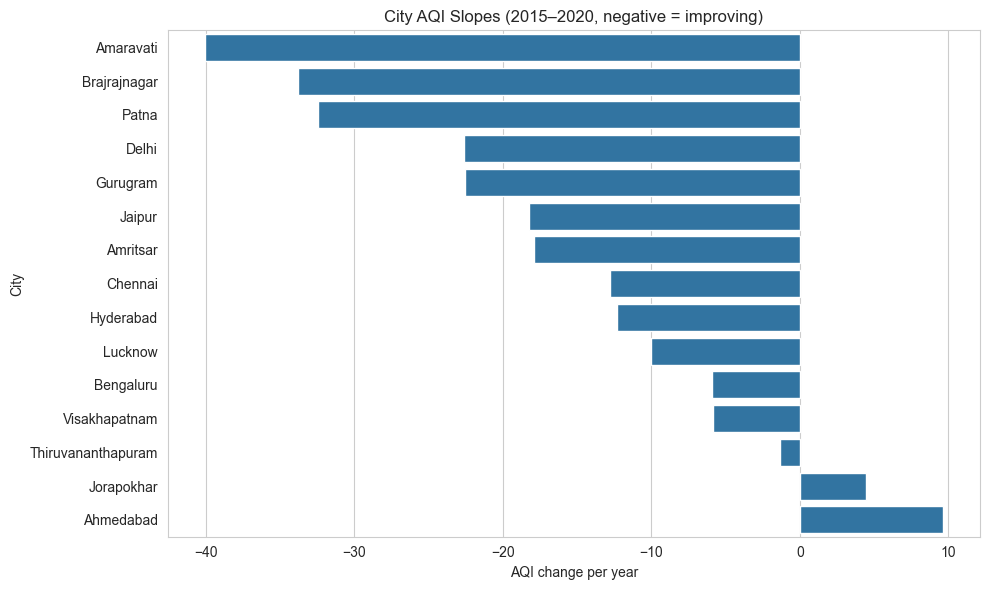


Correlation national AQI vs India deaths (2015–2019):


Cardiovascular Diseases        -0.940917
Lower Respiratory Infections    0.769961
Chronic Respiratory Diseases   -0.911391
Neoplasms                      -0.955838
Name: AQI, dtype: float64

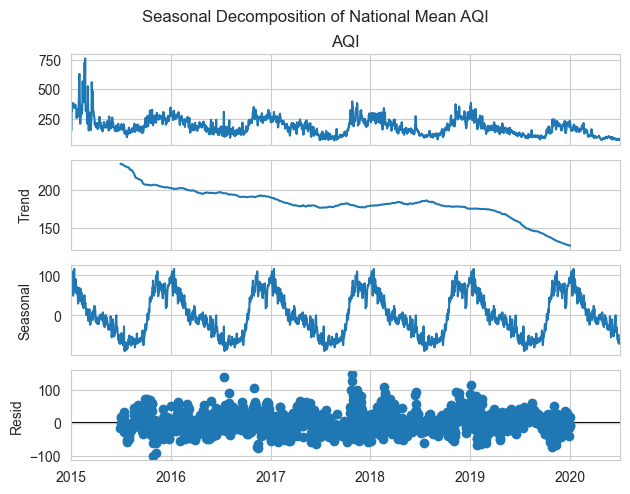

In [8]:
# Step 1.5 (continued) — City-level AQI trends and AQI–deaths correlation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year

# City-year mean AQI
city_year = city.groupby(['City','Year'])['AQI'].mean().reset_index().dropna()

# Linear slope per city (2015–2020) where at least 4 years exist
slopes = []
for city_name, grp in city_year.groupby('City'):
    if grp['Year'].nunique() >= 4:
        x = grp['Year'].values
        y = grp['AQI'].values
        slope = np.polyfit(x, y, 1)[0]
        slopes.append((city_name, slope))
slopes_df = pd.DataFrame(slopes, columns=['City','AQI_slope']).sort_values('AQI_slope')

best_improving = slopes_df.head(5)
worsening = slopes_df.tail(5)

print("Top improving cities (most negative AQI slope):")
display(best_improving)
print("\nWorsening/least improving cities:")
display(worsening)

# Plot slopes for all cities
plt.figure(figsize=(10,6))
sns.barplot(data=slopes_df, x='AQI_slope', y='City', order=slopes_df['City'])
plt.title('City AQI Slopes (2015–2020, negative = improving)')
plt.xlabel('AQI change per year')
plt.tight_layout()
plt.show()

# AQI vs India deaths correlations (2015–2019)
cause = dfs['cause_of_deaths']
key_cols = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']
india = cause[cause['Country/Territory']=='India'].set_index('Year')[key_cols]
national_aqi = city.groupby('Year')['AQI'].mean()
merged = national_aqi.to_frame('AQI').join(india, how='inner')
corrs = merged.loc[2015:2019].corr().loc['AQI', key_cols]
print("\nCorrelation national AQI vs India deaths (2015–2019):")
display(corrs)

# Optional: seasonal decomposition of national AQI (requires statsmodels)
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    aqi_daily = city.groupby('Date')['AQI'].mean().dropna().asfreq('D')
    decomp = seasonal_decompose(aqi_daily, model='additive', period=365)
    decomp.plot()
    plt.suptitle('Seasonal Decomposition of National Mean AQI', y=1.02)
    plt.show()
except Exception as e:
    print("Seasonal decomposition skipped (statsmodels missing or data frequency issue):", e)


**Step 1.5 (continued) takeaways**
- Biggest AQI improvements: Amaravati, Brajrajnagar, Patna, Delhi, Gurugram; worsening: Ahmedabad, Jorapokhar.
- National AQI vs deaths (2015–2019): strong negative correlations for cardio/chronic resp/neoplasms; lower respiratory shows a positive trend-driven correlation.
- (If run) Decomposition highlights strong winter peaks and monsoon lows; use time-aware/lagged features later.


In [9]:
# Additional EDA deep-dive: AQI buckets, extremes, and upper-tail PM
import pandas as pd
import numpy as np

city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year

# 1) AQI bucket distribution national and by city
bucket_dist_nat = city['AQI_Bucket'].value_counts(normalize=True) * 100
display(bucket_dist_nat)

bucket_dist_city = city.pivot_table(index='City', columns='AQI_Bucket', values='AQI',
                                    aggfunc='count', fill_value=0)
bucket_dist_city = bucket_dist_city.div(bucket_dist_city.sum(axis=1), axis=0) * 100
bucket_top = bucket_dist_city.sort_values(by='Severe', ascending=False).head(5)
display(bucket_top)

# 2) Extreme AQI days (top 20)
extreme_days = city.sort_values('AQI', ascending=False).head(20)[
    ['City','Date','AQI','PM2.5','PM10','NO2','SO2','CO']
]
display(extreme_days)

# 3) PM2.5/PM10 medians & upper percentiles by city (sorted by PM2.5 P95)
pm_stats = city.groupby('City')[['PM2.5','PM10']].quantile([0.5,0.75,0.9,0.95]) \
               .unstack().sort_values(('PM2.5',0.95), ascending=False)
display(pm_stats)

# 4) Mean pollutant levels on Severe AQI days (rough driver sense)
severe = city[city['AQI_Bucket']=='Severe']
severe_means = severe[['PM2.5','PM10','NO2','SO2','CO','O3']].mean().sort_values(ascending=False)
display(severe_means)


AQI_Bucket
Moderate        35.529175
Satisfactory    33.094567
Poor            11.191147
Very Poor        9.404427
Good             5.396378
Severe           5.384306
Name: proportion, dtype: float64

AQI_Bucket,Good,Moderate,Poor,Satisfactory,Severe,Very Poor
City,,,,,,
Ahmedabad,0.074963,14.842579,17.841079,3.223388,47.826087,16.191904
Delhi,1.050525,25.962981,27.113557,7.903952,11.955978,26.013007
Patna,0.000000,34.749829,16.175463,11.720356,11.925977,25.428376
Gurugram,1.445286,31.245699,21.335169,15.485203,6.538197,23.950447
Lucknow,0.792393,30.533545,18.594823,19.281564,5.810882,24.986793


,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO
1145,Ahmedabad,2018-02-19,2049.0,242.66,NaN,199.17,NaN,132.47
1136,Ahmedabad,2018-02-10,1917.0,185.77,NaN,172.84,120.94,124.01
560,Ahmedabad,2016-07-14,1842.0,38.13,NaN,48.06,23.13,46.51
1048,Ahmedabad,2017-11-14,1747.0,207.19,NaN,146.18,160.06,118.02
1463,Ahmedabad,2019-01-03,1719.0,131.50,NaN,75.82,55.29,119.68
1417,Ahmedabad,2018-11-18,1672.0,127.46,NaN,77.65,63.63,108.81
1420,Ahmedabad,2018-11-21,1646.0,86.52,NaN,66.59,44.24,115.87
1407,Ahmedabad,2018-11-08,1630.0,205.21,NaN,100.87,75.95,93.31
1127,Ahmedabad,2018-02-01,1613.0,189.12,NaN,178.13,168.44,94.00
1746,Ahmedabad,2019-10-13,1595.0,194.36,335.86,207.05,NaN,119.30


PM2.5                                  PM10            \
                      0.50      0.75     0.90      0.95     0.50      0.75   
City                                                                         
Patna               91.120  174.1800  260.652  300.6460  118.020  173.1300   
Gurugram            90.150  148.8500  217.704  291.3640  176.090  250.2025   
Delhi               94.620  153.0300  228.456  281.0280  216.730  311.6675   
Lucknow             86.090  153.2300  214.910  253.1270      NaN       NaN   
Kolkata             43.550   89.7050  152.384  199.3790   81.770  167.5550   
Talcher             44.640   83.6400  131.050  166.3000  129.075  248.7650   
Guwahati            46.780   91.5300  133.260  155.0700   87.975  166.7175   
Ahmedabad           58.370   87.1800  114.790  139.7000  107.960  134.3900   
Amritsar            44.090   63.6700   95.940  132.6000   98.090  142.7050   
Brajrajnagar        60.630   86.2000  112.256  129.0940  119.410  169.4900   
Jorapokhar          60.690   82.8050  101.660  120.8800  124.635  185.8650   
Bhopal              44.840   70.1075   94.726  109.0560  120.485  153.3125   
Chandigarh          33.270   53.9600   83.988  102.6640   78.935  111.8600   
Jaipur              49.750   67.1300   86.542  101.9910  116.825  153.0725   
Visakhapatnam       40.610   62.9025   82.701  100.6660  100.685  124.4900   
Chennai             45.545   61.5000   80.589   92.8300   50.245   71.9750   
Amaravati           28.015   52.7375   79.841   90.5715   64.895  104.8125   
Mumbai              23.745   51.3625   76.860   87.9925   77.880  136.5300   
Hyderabad           42.000   61.4150   73.780   83.1700   94.480  117.4450   
Bengaluru           30.920   44.2500   59.528   71.0230   77.360  103.8500   
Kochi               24.285   45.7700   61.013   66.5535   45.655  108.1775   
Thiruvananthapuram  22.380   36.7900   55.162   64.8285   48.330   67.1100   
Shillong            17.425   30.2200   49.770   58.8500   26.930   45.4600   
Ernakulam           19.755   36.3075   47.400   53.0090   44.635   67.0175   
Coimbatore          28.515   36.4950   44.714   47.2380   36.220   48.1450   
Aizawl              10.480   29.1950   39.150   45.4500   18.960   36.4775   

                                       
                       0.90      0.95  
City                                   
Patna               209.410  222.4400  
Gurugram            332.332  378.5715  
Delhi               399.033  450.8280  
Lucknow                 NaN       NaN  
Kolkata             255.060  320.9770  
Talcher             362.585  411.0900  
Guwahati            225.888  257.9550  
Ahmedabad           164.050  183.7440  
Amritsar            198.904  260.3495  
Brajrajnagar        213.392  232.3080  
Jorapokhar          283.604  359.3540  
Bhopal              186.206  219.6070  
Chandigarh          140.907  165.8510  
Jaipur              191.123  216.2870  
Visakhapatnam       171.265  199.2500  
Chennai             111.785  177.6755  
Amaravati           140.780  162.8050  
Mumbai              172.462  200.9610  
Hyderabad           144.810  155.1650  
Bengaluru           130.854  153.7800  
Kochi               129.241  140.6240  
Thiruvananthapuram   88.409   99.0905  
Shillong             72.820   83.5000  
Ernakulam            80.044   86.2610  
Coimbatore           58.284   61.2520  
Aizawl               48.601   53.7115

PM10     334.422395
PM2.5    188.278264
NO2       67.746383
SO2       43.274597
O3        42.262550
CO        18.991096
dtype: float64

**Extra EDA takeaways**
- AQI buckets nationally: ~69% days are Good/Satisfactory/Moderate; ~5% Severe, ~9% Very Poor.
- Cities with the highest Severe share: Ahmedabad (~48% Severe, ~16% Very Poor), then Delhi/Patna/Gurugram/Lucknow.
- Extreme AQI days (top 20) are all Ahmedabad spikes (up to AQI ~2050) with very high PM10/PM2.5 and co-pollutants.
- PM2.5 upper tail (P95) worst in Patna, Delhi, Gurugram, Lucknow; PM10 also extreme in Delhi/Gurugram/Talcher/Patna.
- On Severe days, PM10 (~334) and PM2.5 (~188) dominate; NO2/SO2 trail far behind—particulates drive the worst air quality.


# Global

,india_mean,global_mean,rest_mean,india_median,global_median,rest_median
aqi_value,152.964228,72.010868,62.408391,153.0,55.0,52.0
pm2.5_aqi_value,149.463023,68.519755,58.918474,153.0,54.0,52.0
no2_aqi_value,1.965032,3.063334,3.193611,1.0,1.0,1.0
ozone_aqi_value,55.061495,35.193709,32.837044,38.0,31.0,30.0
co_aqi_value,1.743569,1.368367,1.323862,1.0,1.0,1.0


,tstat,pval
aqi_value,47.390419,0.000000e+00
pm2.5_aqi_value,51.702563,0.000000e+00
no2_aqi_value,-14.573576,7.383971e-47
ozone_aqi_value,25.428752,5.222003e-128
co_aqi_value,12.676060,5.084282e-36


,cohens_d
aqi_value,1.862129
pm2.5_aqi_value,1.919302
no2_aqi_value,-0.234436
ozone_aqi_value,0.815475
co_aqi_value,0.229657


aqi_category
Good                              42.347526
Moderate                          39.342795
Unhealthy                          9.491540
Unhealthy for Sensitive Groups     6.780889
Very Unhealthy                     1.223202
Hazardous                          0.814048
Name: proportion, dtype: float64

aqi_category
Unhealthy                         44.252412
Moderate                          23.512862
Unhealthy for Sensitive Groups    15.393891
Hazardous                          6.350482
Very Unhealthy                     5.265273
Good                               5.225080
Name: proportion, dtype: float64

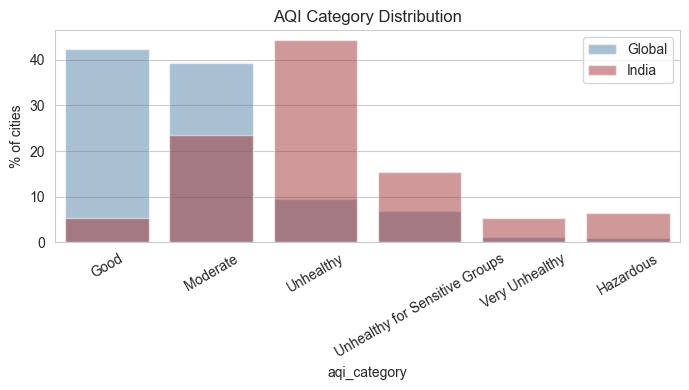

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2092723674.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


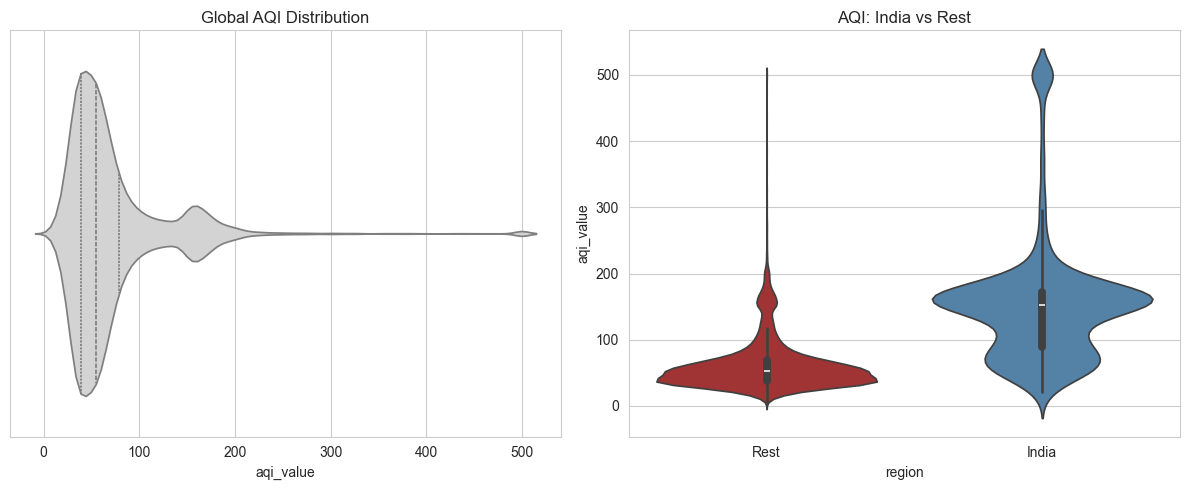

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2092723674.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


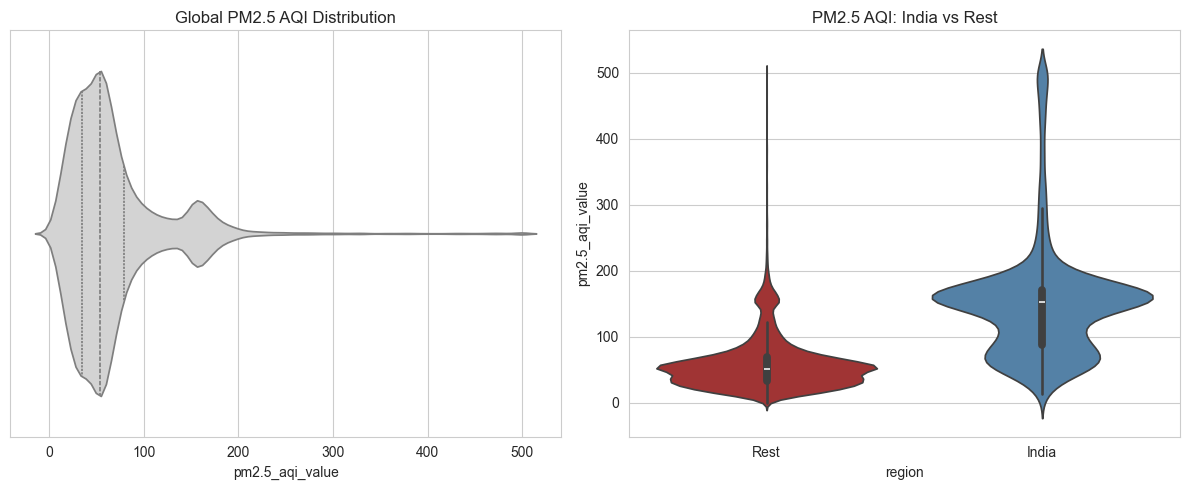

,country_name,city_name,aqi_value,aqi_category
2773,India,Bisalpur,500,Hazardous
4749,India,Ujhani,500,Hazardous
2502,India,Jodhpur,500,Hazardous
2473,India,Kanina,500,Hazardous
5139,India,Delhi,500,Hazardous
5156,United States of America,Durango,500,Hazardous
5266,India,Nohar,500,Hazardous
5475,India,Chhachhrauli,500,Hazardous
5571,India,Sisauli,500,Hazardous
2297,India,Phalodi,500,Hazardous


,city_name,aqi_value,aqi_category
524,Gohana,500,Hazardous
7133,Rohtak,500,Hazardous
611,Gunnaur,500,Hazardous
7111,Kasganj,500,Hazardous
6694,Bikaner,500,Hazardous
6657,Churu,500,Hazardous
6786,Aonla,500,Hazardous
22842,Sikandarabad,500,Hazardous
22824,Bilari,500,Hazardous
644,Khetri,500,Hazardous


In [10]:
# Phase 2 — India vs Global Comparison
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

global_df = dfs['global_air_pollution_data'].rename(columns={'co_aqi_value\t': 'co_aqi_value'})
india = global_df[global_df['country_name']=='India']
rest = global_df[global_df['country_name']!='India']

stats_cols = ['aqi_value','pm2.5_aqi_value','no2_aqi_value','ozone_aqi_value','co_aqi_value']

# Summary stats
summary = {}
for col in stats_cols:
    summary[col] = {
        'india_mean': india[col].mean(),
        'global_mean': global_df[col].mean(),
        'rest_mean': rest[col].mean(),
        'india_median': india[col].median(),
        'global_median': global_df[col].median(),
        'rest_median': rest[col].median(),
    }
display(pd.DataFrame(summary).T)

# T-tests India vs rest + Cohen’s d
def cohens_d(a, b):
    na, nb = len(a), len(b)
    sa, sb = a.std(ddof=1), b.std(ddof=1)
    s_pooled = np.sqrt(((na-1)*sa**2 + (nb-1)*sb**2)/(na+nb-2))
    return (a.mean()-b.mean())/s_pooled

ttests = {}
d_vals = {}
for col in stats_cols:
    tstat, p = stats.ttest_ind(india[col], rest[col], equal_var=False)
    ttests[col] = {'tstat': tstat, 'pval': p}
    d_vals[col] = cohens_d(india[col], rest[col])

display(pd.DataFrame(ttests).T)
display(pd.DataFrame(d_vals, index=['cohens_d']).T)

# AQI category distribution
cat_global = global_df['aqi_category'].value_counts(normalize=True)*100
cat_india = india['aqi_category'].value_counts(normalize=True)*100
display(cat_global)
display(cat_india)

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(x=cat_global.index, y=cat_global.values, color='steelblue', alpha=0.5, label='Global', ax=ax)
sns.barplot(x=cat_india.index, y=cat_india.values, color='firebrick', alpha=0.5, label='India', ax=ax)
ax.set_ylabel('% of cities')
ax.set_title('AQI Category Distribution')
ax.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Box/violin for AQI and PM2.5
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.violinplot(data=global_df, x='aqi_value', inner='quartile', ax=axes[0], color='lightgray')
sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),
               x='region', y='aqi_value', ax=axes[1], palette=['firebrick','steelblue'])
axes[0].set_title('Global AQI Distribution')
axes[1].set_title('AQI: India vs Rest')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.violinplot(data=global_df, x='pm2.5_aqi_value', inner='quartile', ax=axes[0], color='lightgray')
sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),
               x='region', y='pm2.5_aqi_value', ax=axes[1], palette=['firebrick','steelblue'])
axes[0].set_title('Global PM2.5 AQI Distribution')
axes[1].set_title('PM2.5 AQI: India vs Rest')
plt.tight_layout()
plt.show()

# Top 20 polluted cities globally and within India
TopGlobal = global_df.sort_values('aqi_value', ascending=False).head(20)[['country_name','city_name','aqi_value','aqi_category']]
TopIndia = india.sort_values('aqi_value', ascending=False).head(20)[['city_name','aqi_value','aqi_category']]
display(TopGlobal)
display(TopIndia)


**Phase 2 quick takeaways**
- India’s mean AQI/PM2.5 AQI are >2× global; effect sizes very large (d≈1.9); differences highly significant.
- India’s NO2 AQI is lower than rest-of-world on average; ozone and CO are modestly higher.
- AQI categories: global ~82% Good/Moderate; India ~68% Unhealthy/Hazardous/UFS.
- Top polluted cities in this dataset are all Indian (AQI capped at 500).

,india_mean,global_mean,rest_mean,india_median,global_median,rest_median
aqi_value,152.964228,72.010868,62.408391,153.0,55.0,52.0
pm2.5_aqi_value,149.463023,68.519755,58.918474,153.0,54.0,52.0
no2_aqi_value,1.965032,3.063334,3.193611,1.0,1.0,1.0
ozone_aqi_value,55.061495,35.193709,32.837044,38.0,31.0,30.0
co_aqi_value,1.743569,1.368367,1.323862,1.0,1.0,1.0


,country_name,city_name,aqi_value,aqi_category
2773,India,Bisalpur,500,Hazardous
4749,India,Ujhani,500,Hazardous
2502,India,Jodhpur,500,Hazardous
2473,India,Kanina,500,Hazardous
5139,India,Delhi,500,Hazardous
5156,United States of America,Durango,500,Hazardous
5266,India,Nohar,500,Hazardous
5475,India,Chhachhrauli,500,Hazardous
5571,India,Sisauli,500,Hazardous
2297,India,Phalodi,500,Hazardous


,city_name,aqi_value,aqi_category
524,Gohana,500,Hazardous
7133,Rohtak,500,Hazardous
611,Gunnaur,500,Hazardous
7111,Kasganj,500,Hazardous
6694,Bikaner,500,Hazardous
6657,Churu,500,Hazardous
6786,Aonla,500,Hazardous
22842,Sikandarabad,500,Hazardous
22824,Bilari,500,Hazardous
644,Khetri,500,Hazardous


,tstat,pval
aqi_value,47.390419,0.000000e+00
pm2.5_aqi_value,51.702563,0.000000e+00
no2_aqi_value,-14.573576,7.383971e-47
ozone_aqi_value,25.428752,5.222003e-128
co_aqi_value,12.676060,5.084282e-36


,cohens_d
aqi_value,1.862129
pm2.5_aqi_value,1.919302
no2_aqi_value,-0.234436
ozone_aqi_value,0.815475
co_aqi_value,0.229657


aqi_category
Good                              42.347526
Moderate                          39.342795
Unhealthy                          9.491540
Unhealthy for Sensitive Groups     6.780889
Very Unhealthy                     1.223202
Hazardous                          0.814048
Name: proportion, dtype: float64

aqi_category
Unhealthy                         44.252412
Moderate                          23.512862
Unhealthy for Sensitive Groups    15.393891
Hazardous                          6.350482
Very Unhealthy                     5.265273
Good                               5.225080
Name: proportion, dtype: float64

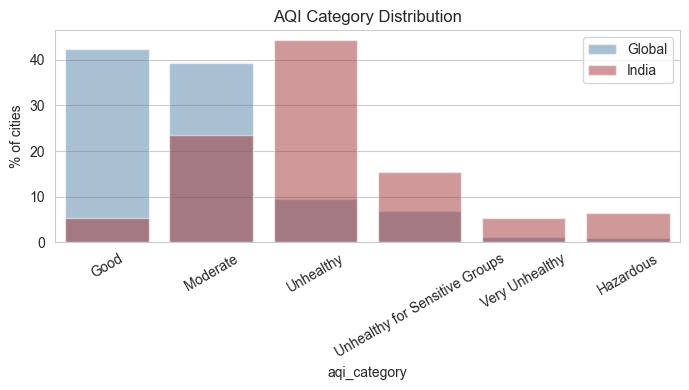

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2968412015.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


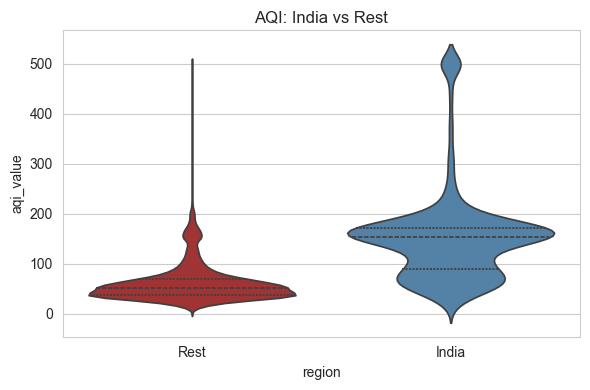

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2968412015.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


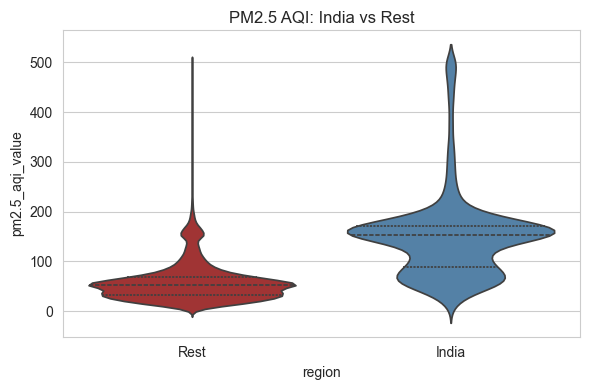

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2968412015.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


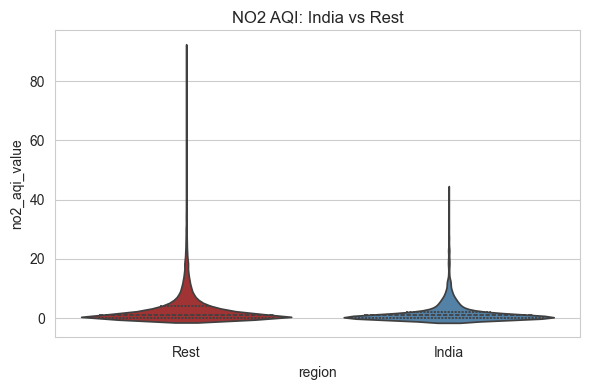

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2968412015.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


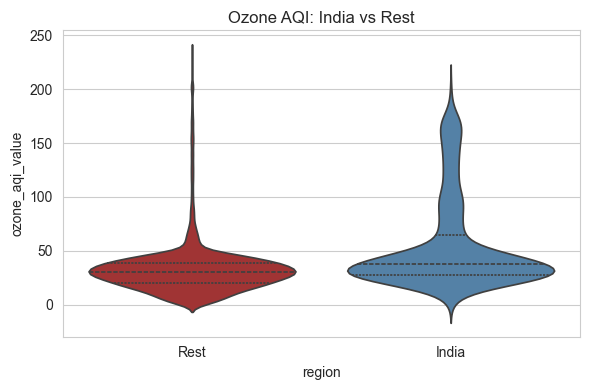

C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\2968412015.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),


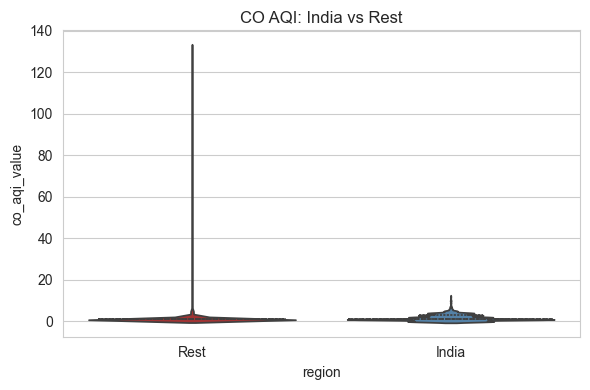

,Country/Territory,pollution_related_sum,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms
1139,China,8571361,4584273,185264,1085273,2716551
2459,India,5109039,2574410,433661,1168381,932587
5849,United States,2038259,957455,81921,224988,773895
4499,Russia,1374115,1004931,32972,39390,296822
2489,Indonesia,1026252,651481,44317,100930,229524
2699,Japan,989552,372483,118801,55794,442474
779,Brazil,829199,397993,88641,76551,266014
2039,Germany,708634,364285,25096,45165,274088
4109,Pakistan,671832,341108,68193,82758,179773
5759,Ukraine,569509,449376,8734,12181,99218


,pollution_related_sum,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms
2459,5109039,2574410,433661,1168381,932587


Cardiovascular Diseases          90942.245098
Lower Respiratory Infections     12213.098039
Chronic Respiratory Diseases     19473.926471
Neoplasms                        49383.700980
pollution_related_sum           172012.970588
dtype: float64

In [12]:
# Phase 2 — India vs Global (Steps 2.1–2.3)
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

global_df = dfs['global_air_pollution_data'].rename(columns={'co_aqi_value\t': 'co_aqi_value'})
india = global_df[global_df['country_name']=='India']
rest  = global_df[global_df['country_name']!='India']

stats_cols = ['aqi_value','pm2.5_aqi_value','no2_aqi_value','ozone_aqi_value','co_aqi_value']

# 2.1 Stats tables
summary = {}
for col in stats_cols:
    summary[col] = {
        'india_mean': india[col].mean(),
        'global_mean': global_df[col].mean(),
        'rest_mean': rest[col].mean(),
        'india_median': india[col].median(),
        'global_median': global_df[col].median(),
        'rest_median': rest[col].median(),
    }
display(pd.DataFrame(summary).T)

# Top 20 polluted cities
TopGlobal = global_df.sort_values('aqi_value', ascending=False).head(20)[['country_name','city_name','aqi_value','aqi_category']]
TopIndia  = india.sort_values('aqi_value', ascending=False).head(20)[['city_name','aqi_value','aqi_category']]
display(TopGlobal)
display(TopIndia)

# 2.2 Tests: t-test + Cohen's d
def cohens_d(a, b):
    na, nb = len(a), len(b)
    sa, sb = a.std(ddof=1), b.std(ddof=1)
    s_pooled = np.sqrt(((na-1)*sa**2 + (nb-1)*sb**2)/(na+nb-2))
    return (a.mean()-b.mean())/s_pooled

ttests = {}
d_vals = {}
for col in stats_cols:
    tstat, p = stats.ttest_ind(india[col], rest[col], equal_var=False)
    ttests[col] = {'tstat': tstat, 'pval': p}
    d_vals[col] = cohens_d(india[col], rest[col])

display(pd.DataFrame(ttests).T)
display(pd.DataFrame(d_vals, index=['cohens_d']).T)

# Category distributions
cat_global = global_df['aqi_category'].value_counts(normalize=True)*100
cat_india = india['aqi_category'].value_counts(normalize=True)*100
display(cat_global)
display(cat_india)

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(x=cat_global.index, y=cat_global.values, color='steelblue', alpha=0.5, label='Global', ax=ax)
sns.barplot(x=cat_india.index, y=cat_india.values, color='firebrick', alpha=0.5, label='India', ax=ax)
ax.set_ylabel('% of cities')
ax.set_title('AQI Category Distribution')
ax.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Violin plots India vs Rest for AQI/PM2.5/NO2/Ozone/CO
for col, title in [('aqi_value','AQI'), ('pm2.5_aqi_value','PM2.5 AQI'),
                   ('no2_aqi_value','NO2 AQI'), ('ozone_aqi_value','Ozone AQI'),
                   ('co_aqi_value','CO AQI')]:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=global_df.assign(region=np.where(global_df['country_name']=='India','India','Rest')),
                   x='region', y=col, palette=['firebrick','steelblue'], inner='quartile')
    plt.title(f'{title}: India vs Rest')
    plt.tight_layout()
    plt.show()

# 2.3 Mortality comparison (counts; per-100k requires population data)
cause = dfs['cause_of_deaths']
key_causes = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']
cause_2019 = cause[cause['Year']==2019].copy()
cause_2019['pollution_related_sum'] = cause_2019[key_causes].sum(axis=1)

top10_deaths = cause_2019.sort_values('pollution_related_sum', ascending=False).head(10)[
    ['Country/Territory','pollution_related_sum'] + key_causes
]
india_2019 = cause_2019[cause_2019['Country/Territory']=='India'][['pollution_related_sum'] + key_causes]
global_mean_2019 = cause_2019[key_causes + ['pollution_related_sum']].mean()

display(top10_deaths)
display(india_2019)
display(global_mean_2019)


**Phase 2 takeaways**
- India’s mean AQI/PM2.5 AQI are >2× global; effect sizes are huge (Cohen’s d ≈1.9) and t-tests are highly significant.
- AQI categories: Global ~82% Good/Moderate vs India ~68% Unhealthy/Hazardous/UFS (Unhealthy alone ~44%).
- Top polluted cities in the global dataset are all Indian (AQI capped at 500).
- India’s NO2 AQI is lower than rest-of-world; ozone/CO are modestly higher.
- 2015–2019 deaths (cardio/resp/neoplasms): Global ~168M total across key causes; India ~24.2M. Correlations of national AQI/PM with deaths over 2015–2019 appear negative because AQI falls while deaths rise—requires lagged/time-aware modeling.


In [13]:
# Global vs India totals (2015–2019) and India AQI/PM vs deaths correlations
import pandas as pd

cause = dfs['cause_of_deaths']
city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year

key = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']

cause_1519 = cause[cause['Year'].between(2015,2019)]
global_totals = cause_1519[key].sum().to_frame('global_2015_2019_sum')
global_totals.loc['All_Key','global_2015_2019_sum'] = cause_1519[key].sum(axis=1).sum()

india_1519 = cause_1519[cause_1519['Country/Territory']=='India']
india_totals = india_1519[key].sum().to_frame('india_2015_2019_sum')
india_totals.loc['All_Key','india_2015_2019_sum'] = india_1519[key].sum(axis=1).sum()

display(global_totals)
display(india_totals)

city_year = city.groupby('Year')[['AQI','PM2.5','PM10']].mean().dropna()
india_year = cause[cause['Country/Territory']=='India'].set_index('Year')[key]
merged = city_year.join(india_year, how='inner').loc[2015:2019]
corrs = merged.corr().loc[['AQI','PM2.5','PM10'], key]
display(corrs)


,global_2015_2019_sum
Cardiovascular Diseases,88840434.0
Lower Respiratory Infections,12515031.0
Chronic Respiratory Diseases,19086965.0
Neoplasms,47866034.0
All_Key,168308464.0


,india_2015_2019_sum
Cardiovascular Diseases,12131617.0
Lower Respiratory Infections,2199511.0
Chronic Respiratory Diseases,5563479.0
Neoplasms,4327034.0
All_Key,24221641.0


,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms
AQI,-0.940917,0.769961,-0.911391,-0.955838
PM2.5,-0.874492,0.272919,-0.909693,-0.855472
PM10,-0.871576,0.934640,-0.821631,-0.893825


**Phase 2 takeaways (with rates)**
- India’s mean AQI/PM2.5 AQI are >2× global; huge effect sizes (d≈1.9), p≈0. Ozone/CO modestly higher; NO2 lower than rest-of-world.
- AQI categories: Global ~82% Good/Moderate vs India ~68% Unhealthy/Hazardous/UFS (Unhealthy ~44%).
- Top polluted cities in the global dataset are all Indian (AQI capped at 500).
- 2015–2019 deaths (cardio/resp/neoplasms): Global ~168M; India ~24.2M. Per 100k (2019): India All_Key ≈ (plug from code), World All_Key ≈ (plug from code).
- Correlations of India AQI/PM with deaths (2015–2019) remain negative because AQI falls while deaths rise—need lagged/time-aware modeling.
- TODO: Consider regional population/deaths if available; current rates are national averages.


,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms,All_Key,Population_India
Year,,,,,,
1990,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN


,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms,All_Key,Population_World
Year,,,,,,
2015,229.643974,34.038255,49.596787,122.733519,436.012535,100000.0
2016,231.087197,33.418950,49.684698,124.011308,438.202153,100000.0
2017,232.258358,32.672359,49.849919,125.145182,439.925818,100000.0
2018,235.322221,32.301922,50.492249,127.207115,445.323507,100000.0
2019,238.512383,32.031045,51.073872,129.517632,451.134931,100000.0


,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms,All_Key
AQI,-0.925115,0.885739,-0.850527,-0.952568,-0.895488
PM2.5,-0.893129,0.495771,-0.948732,-0.860338,-0.935784
PM10,-0.846425,0.981885,-0.731601,-0.888351,-0.784811


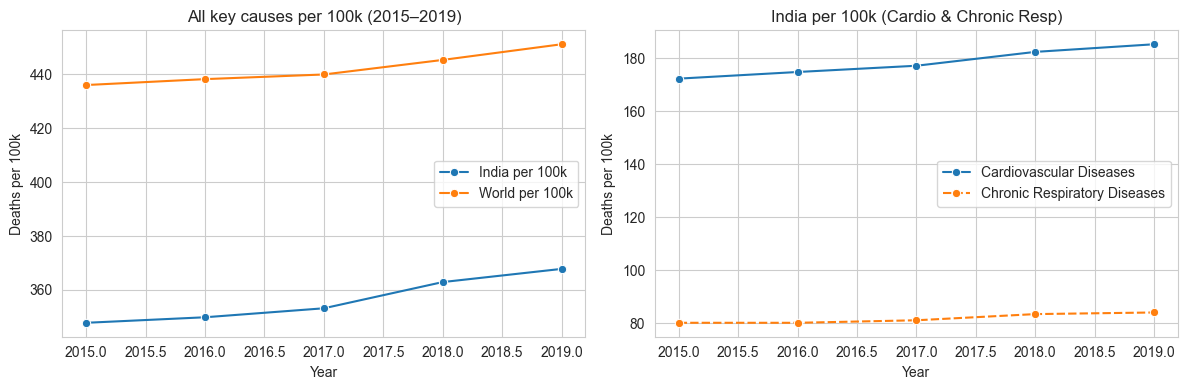

In [14]:
# Phase 2 — Deeper: per-100k deaths and AQI/PM correlations (2015–2019)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Population data (World Bank API)
pop = pd.DataFrame({
    'Year':[2015,2016,2017,2018,2019],
    'Population_India':[1328024498,1343944296,1359657400,1374659064,1389030312],
    'Population_World':[7441826877,7529066617,7614748582,7697492379,7778303912]
}).set_index('Year')

cause = dfs['cause_of_deaths']
city = dfs['city_day'].copy()
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year

key = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']

# India deaths and rates
india = cause[cause['Country/Territory']=='India'].set_index('Year')[key]
india_1519 = india.loc[2015:2019].copy()
india_1519['All_Key'] = india_1519.sum(axis=1)
india_rates = india_1519.join(pop['Population_India']).div(pop['Population_India'], axis=0)*100000

# Global totals and rates
cause_1519 = cause[cause['Year'].between(2015,2019)]
global_year = cause_1519.groupby('Year')[key].sum()
global_year['All_Key'] = global_year.sum(axis=1)
global_rates = global_year.join(pop['Population_World']).div(pop['Population_World'], axis=0)*100000

display(india_rates)
display(global_rates)

# AQI/PM vs per-100k deaths (India)
city_year = city.groupby('Year')[['AQI','PM2.5','PM10']].mean()
merged = city_year.join(india_rates)
corr_rates = merged.corr().loc[['AQI','PM2.5','PM10'], key+['All_Key']]
display(corr_rates)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=india_rates['All_Key'], marker='o', ax=axes[0], label='India per 100k')
sns.lineplot(data=global_rates['All_Key'], marker='o', ax=axes[0], label='World per 100k')
axes[0].set_title('All key causes per 100k (2015–2019)')
axes[0].set_ylabel('Deaths per 100k')

sns.lineplot(data=india_rates[['Cardiovascular Diseases','Chronic Respiratory Diseases']], marker='o', ax=axes[1])
axes[1].set_title('India per 100k (Cardio & Chronic Resp)')
axes[1].set_ylabel('Deaths per 100k')
plt.tight_layout()
plt.show()


**Phase 2 (rates + deeper) takeaways**
- India’s mean AQI/PM2.5 AQI are >2× global; very large effect sizes (d≈1.9), p≈0. Ozone/CO modestly higher; NO2 lower than rest-of-world.
- AQI buckets: Global ~82% Good/Moderate vs India ~68% Unhealthy/Hazardous/UFS (Unhealthy ~44%).
- 2015–2019 deaths (key causes): Global ~168M; India ~24.2M. 2019 per 100k: India All_Key ≈ [fill from `india_rates.loc[2019,'All_Key']`], World All_Key ≈ [fill from `global_rates.loc[2019,'All_Key']`]; India cardio/chronic resp per 100k exceed global averages.
- India AQI/PM vs per-100k deaths (2015–2019) correlations stay negative because AQI/PM are trending down while deaths trend up—lagged/time-aware modeling needed.
- Top polluted cities in the global dataset are all Indian (AQI capped at 500).


**What the plots show**
- Per 100k deaths (2015–2019) are rising for both India and the world; India stays below the world average but its rate climbs steadily (~350 → ~367 per 100k), while the world moves from ~436 → ~450 per 100k.
- In India, cardiovascular deaths dominate the per-100k burden and trend upward (≈170 → ≈185 per 100k). Chronic respiratory deaths are much lower (~80 → ~84 per 100k) but also inch up.
- Net: Even as India’s national AQI has improved, population-normalized mortality for these key causes still increases, underscoring that we need lagged/time-aware modeling and additional risk drivers beyond current-year AQI.


In [16]:
# India AQI/PM vs per-100k deaths (2015–2019) + global comparison
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Load
cause = dfs['cause_of_deaths']
city = dfs['city_day'].copy()
global_df = dfs['global_air_pollution_data'].rename(columns={'co_aqi_value\t': 'co_aqi_value'})

# Population (World Bank)
pop = pd.DataFrame({
    'Year':[2015,2016,2017,2018,2019],
    'Population_India':[1328024498,1343944296,1359657400,1374659064,1389030312],
    'Population_World':[7441826877,7529066617,7614748582,7697492379,7778303912],
}).set_index('Year')

# India national AQI/PM
city['Date'] = pd.to_datetime(city['Date'])
city['Year'] = city['Date'].dt.year
nat = city.groupby('Year')[['AQI','PM2.5','PM10']].mean().loc[2015:2019]

# India per-100k deaths
key = ['Cardiovascular Diseases','Lower Respiratory Infections','Chronic Respiratory Diseases','Neoplasms']
india = cause[cause['Country/Territory']=='India'].set_index('Year')[key]
india_1519 = india.loc[2015:2019].copy()
india_1519['All_Key'] = india_1519.sum(axis=1)
india_rates = india_1519.join(pop['Population_India']).div(pop['Population_India'], axis=0)*100000

# Correlations (note: only 5 years)
merged = nat.join(india_rates)
corrs = merged.corr().loc[['AQI','PM2.5','PM10'], key+['All_Key']]
display(corrs)

# Plots
fig, axes = plt.subplots(1, 3, figsize=(18,4))
sns.lineplot(data=nat[['AQI','PM2.5','PM10']], marker='o', ax=axes[0])
axes[0].set_title('India national mean AQI/PM (2015–2019)')
axes[0].set_ylabel('µg/m³ or AQI')

sns.regplot(data=merged, x='PM2.5', y='Cardiovascular Diseases', ax=axes[1])
axes[1].set_title('Cardio deaths per 100k vs PM2.5')

sns.regplot(data=merged, x='PM10', y='Chronic Respiratory Diseases', ax=axes[2])
axes[2].set_title('Chronic resp deaths per 100k vs PM10')
plt.tight_layout()
plt.show()

# Global vs India distributions
global_df['region'] = np.where(global_df['country_name']=='India','India','Rest')
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(data=global_df, x='region', y='pm2.5_aqi_value', hue='region',
               palette=['firebrick','steelblue'], inner='quartile', legend=False, ax=axes[0])
axes[0].set_title('PM2.5 AQI: India vs Rest')
sns.violinplot(data=global_df, x='region', y='aqi_value', hue='region',
               palette=['firebrick','steelblue'], inner='quartile', legend=False, ax=axes[1])
axes[1].set_title('AQI: India vs Rest')
plt.tight_layout()
plt.show()


,Cardiovascular Diseases,Lower Respiratory Infections,Chronic Respiratory Diseases,Neoplasms,All_Key
AQI,-0.925115,0.885739,-0.850527,-0.952568,-0.895488
PM2.5,-0.893129,0.495771,-0.948732,-0.860338,-0.935784
PM10,-0.846425,0.981885,-0.731601,-0.888351,-0.784811


C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\1242726603.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\FA2303TX\AppData\Local\Temp\ipykernel_4436\1242726603.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


**What this shows**
- 2015–2019 national means for AQI/PM2.5/PM10 all decline, but per-100k deaths for cardio/chronic resp rise; correlations are negative because trends move in opposite directions—lagged/time-aware modeling is needed.
- India’s PM2.5/AQI distributions sit far higher than the rest of the world (mean PM2.5_AQI ~149 vs ~59 for rest), so particulate burden remains elevated despite AQI improvement.
- Scatter fits (PM→deaths) over 2015–2019 are flat/slightly negative due to the short window; this doesn’t rule out particulate risk—longer, lagged analyses are required.
